![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

In [ ]:
#Escribe el título del proyecto en Markdown
titulo = "Artistas o grupos musicales con más exitos en Billboard Hot 100"
URL="https://en.wikipedia.org/wiki/Billboard_Hot_100"
introduction=' The first number-one song of the Billboard Hot 100 was "Poor Little Fool" by Ricky Nelson, on  started on August 4th 1958 As of the issue for the week ending on December 30th 2023, the Billboard Hot 100 has had 1,161 different number-one entries. The current number-one song on the chart is "All I Want for Christmas Is You" by Mariah Carey.[6]"'

edades de los artistas o grupos top

univariante
decidir que hacer con los géneros
columna por género
    

### TEMA

In [ ]:
# Describe brevemente el tema del proyecto en Markdown
tema = "Exitos musicales en la lista Billboard Hot 100 desde 1966"

### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Deberás tener más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

In [ ]:
# Escribe tu hipótesis principal en Markdown
hipotesis_1 = "Qué grupo o artista es el que más éxitos ha tenido desde 1966"

In [ ]:
# Escribe más hipótesis si las hubiera en Markdown
hipotesis_2 = "Que grupo o artista llevan más años en las listas más tiempo y de que generos"
hipotesis_3 = "Que grupo o artista llevan más exitos en los ultimos 10 años y de que generos"
hipotesis_4 = "Qué grupo o artista han sido 1 hit wonder y de que generos"
hipotesis_5 = "Qué generos corresponden a cada grupo o artista anterior"

# ...


## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

In [ ]:
import ast
import json
import numpy as np
import os
import pandas as pd
from bootcampviztools import *
#from bootcampviztools2 import *
from edafunctions import *


# guarda en variables los datasets y su fuente
df_Hot_100_Audio_Features = pd.read_csv("./data/Hot_100_Audio_Features.csv").set_index('index')#con género unknown
#df_Hot_100_Audio_Features_original = pd.read_csv("./data/Hot_100_Audio_Features_original.csv").set_index('index')#sin género unknown
#df_compare= df_Hot_100_Audio_Features.compare(df_Hot_100_Audio_Features_original)
#limpio duplicados
df_Hot_100_Audio_Features_backup_20240103 = df_Hot_100_Audio_Features.copy()
df_Hot_100_Audio_Features.drop_duplicates(inplace=True)
df_Hot_Stuff = pd.read_csv("./data/Hot_Stuff.csv").set_index('index')
#df_genres_modificado = pd.read_csv("./data/df_genres_20231228_2104_without_column_unknown.csv",sep=";").set_index("index")
fuente_1 = "https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features"
#convierto en otra columna los géneros en una lista 
df_Hot_100_Audio_Features_backup = df_Hot_100_Audio_Features.copy()
#los vacíos son ahora del género unknown 
df_Hot_100_Audio_Features.spotify_genre.fillna("['unknown']",inplace=True)
#los nan de deanceability son ahora 0
df_Hot_100_Audio_Features.danceability.fillna(0,inplace=True)
#con este instrucción creo la columna género adicional como lista 
df_Hot_100_Audio_Features["spotify_genre_list"] = df_Hot_100_Audio_Features.spotify_genre.apply(ast.literal_eval)
#elimino los registros anteriormente nulos y ahora con valor 'unknown'
value_to_find='unknown'
df_Hot_100_Audio_Features.drop(df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].index,inplace=True)
#reemplazo los espacios en los nombres por un guión bajo para poder referenciarlos correctamente cuando sea el nombre de una columna
df_Hot_100_Audio_Features.spotify_genre_list = df_Hot_100_Audio_Features.spotify_genre_list.apply(lambda x: [item.replace(" ", "_") for item in x])
df_Hot_100_Audio_Features['spotify_genre_list_no_dups'] = df_Hot_100_Audio_Features.spotify_genre_list.apply(set)#elimino duplicados
df_Hot_100_Audio_Features['spotify_genre_list_no_dups'] = df_Hot_100_Audio_Features.spotify_genre_list.apply(list)#lo vuelvo a convertir en lista
df_Hot_100_Audio_Features.danceability.fillna(0,inplace=True)#pongo a 0 los nulos de danceability
df_Hot_100_Audio_Features_genres_EDA=df_Hot_100_Audio_Features.copy()
df_Hot_Stuff_with_genres = pd.merge(df_Hot_100_Audio_Features_genres_EDA, df_Hot_Stuff, on='SongID', how='inner')
df_Hot_Stuff_with_genres["WeekID_As_Date"] = pd.to_datetime(df_Hot_Stuff_with_genres.WeekID)


In [ ]:
#creo un diccionario para crear las columnnas del dataset de generos
list_with_all_genres =[]
for valor in df_Hot_100_Audio_Features.spotify_genre_list_no_dups:#
    #print(type(valor))
    if len(valor)==1:#solo un elemento
        if valor[0] not in list_with_all_genres:
            list_with_all_genres.append(valor[0])
    elif len(valor)>1:#varios elementos, necesito añadir cada elemento de la lista
        i=0
        for i in range(len(valor)):
            if valor[i] not in list_with_all_genres:
                list_with_all_genres.append(valor[i])
#print(f"Longitud de todos los géneros:{len(list_with_all_genres)}")
dict_with_all_genres={}#creo el diccionario
for valor in list_with_all_genres:
        for row_spotify_genre_list_no_dups in df_Hot_100_Audio_Features.spotify_genre_list_no_dups:
            if valor in row_spotify_genre_list_no_dups:
                if valor in dict_with_all_genres.keys():
                    dict_with_all_genres[valor]=dict_with_all_genres[valor]+1 #acumulo
                else:
                    dict_with_all_genres[valor]=1 #inicializo a 1
top_50_entries = dict(sorted(dict_with_all_genres.items(), key=lambda item: item[1], reverse=True)[:50])#lo ordeno descendentemente y cojo 50 elementos
list_top_50_entries=list(top_50_entries.keys()) #saco las claves del diccionario
valor_de_corte = list(top_50_entries.values())[-1] #lo convierto a listo y cogo el valor más bajo
df_genres = df_Hot_100_Audio_Features[['SongID','spotify_genre_list_no_dups']].copy() # creo una copia con todas las canciones así mantengo el index

for value in list_top_50_entries:#creo todas las columnas de género a False
    df_genres[value]=False

for index,row in df_Hot_100_Audio_Features.iterrows():#recorro los indices,filas para actualizar la canción con su género a True
    for value in row['spotify_genre_list_no_dups']:
        if value in list_top_50_entries:
            df_genres.at[index, value] = True
#elimino los que tienen todo a False
acumulador_false=0 #para contar si llega a 50
indices=[]
for index,row in df_genres.iterrows():
    for column in list_top_50_entries:
        if row[column]==False:
            acumulador_false=acumulador_false+1
    #print(f"index:{index} acumulador_false:{acumulador_false}")
    if acumulador_false==50:
            indices.append(index) # me guardo el indice para borrarlo luego
    acumulador_false=0
df_genres_backup = df_genres.copy() # por si acaso
df_genres.drop(indices,inplace=True) # se quedan más de 21000 registros de casi 26000

In [ ]:
#acumulo por género y rango de fechas empezando por el 1 de Enero de la fecha más antigua en grupos de 5 años
filtered=df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['Previous Week Position'].isna()] 
#para que solo aparezca los registros la primera vez que aparecieron en el billboard
filtered=filtered.sort_values(by='WeekID_As_Date')#obtengo la fecha más antigua
###
initial_date = pd.to_datetime(filtered.iloc[[0]]['WeekID_As_Date'].dt.strftime('%Y/%m/%d').values[0])  #obtengo la fecha más antigua
filtered=filtered.sort_values(by='WeekID_As_Date',ascending=False) #obtengo la fecha más reciente
last_date=pd.to_datetime(filtered.iloc[[0]]['WeekID_As_Date'].dt.strftime('%Y/%m/%d').values[0]) #obtengo la fecha más reciente
##
multiple=False #para buscar múltiples de cinco
last_date_year = last_date.year
while multiple==False:

    if (last_date_year - initial_date.year) % 5 == 0:# para hacer grupos de 5 años en la comparativa
            multiple=True
    else:
            multiple=False
            last_date_year+=1

start_date= pd.to_datetime(str(initial_date.year) + "/01/01")
end_date = pd.to_datetime(str(last_date_year)+"/12/31")+pd.Timedelta(days=1)
#print("initial_date:",initial_date)
#print("last_date:",last_date)
#print(f"last_date_year:{last_date_year}")
#initial_year =pd.to_datetime(initial_date.astype(str)).year
#initial_year=str(initial_year)
#print(initial_year)
#full_initial_date=pd.to_datetime(year+"/01/01")
#full_initial_date
#fecha de inicio
#filtro por rango de fechas 5 años filtered
    #cuento cuantos géneros están a True
    #guardo el .csv con fecha inicio y fecha fin del bucle
#print(date_range)
#print(start_date+ pd.DateOffset(years=5))


In [ ]:

def save_to_csv(dataframe_df,column_name_as_string,start_year=0,end_year=0):#no funciona desde edafunctions.py :(
    # Save the dataset for the current interval (you can save it to a file or use as needed)
    folder_path=f"./data_{column_name_as_string}" # genero si no existe el directorio
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_name = f"./data_{column_name_as_string}/{column_name_as_string}_counts_{start_year}-{end_year}.csv" #genero el nombre de fichero en la carpeta anterior
    dataframe_df.reset_index(inplace=True) # reseteo el indice
    dataframe_df.index.name="index" # le llamo index
    dataframe_df.to_csv(file_name,index=False,sep=";")  # Save to a CSV file

In [219]:
start = start_date #para el bucle
while start < end_date:
    end = start + pd.DateOffset(years=5)
    if (end_date.year-end.year)==1:#para que coja las últimas fechas
        end=end_date
    # Filter the dataset for the current interval
    interval_data = filtered[(filtered['WeekID_As_Date'] >= start) & (filtered['WeekID_As_Date'] < end)] # filtro por las fechas
    #filtro las canciones con columna género a True/False que están en interval_data
    filtered_df_genres = df_genres[df_genres['SongID'].isin(interval_data['SongID'])]
    list_of_data=[] #donde guardaré cada registro de data
    
    for column in filtered_df_genres[list_top_50_entries].columns:
        
        if filtered_df_genres[column].any():  # Check if any True values exist in the column
            count_true = filtered_df_genres[column].sum()  # Count True values in the column
            data={}#creo la estructura de cada fila del dataset en un dictionario
            data['genre']=column
            data['totals']=count_true
            list_of_data.append(data)#creo una lista de diccionarios
        genre_totals_df=pd.DataFrame(list_of_data) # creo el dataset
        genre_totals_df['start_date']=start #es el rango de corte
        genre_totals_df['end_date']=end+pd.Timedelta(days=-1) # es el rango de corte
        save_to_csv(genre_totals_df,'genre',start.year,end.year)#lo guardo como csv para no repetir todo el proceso
    start = start + pd.DateOffset(years=5) # le sumo 5 años más
    if end==end_date:#para forzar la salida del bucle
        #print("entro y end vale:",end_date)
        start = end + pd.Timedelta(days=1)
        #print("entro y start vale:",start)

In [ ]:
#df_genres_modificado

In [ ]:
#df_Hot_100_Audio_Features

https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features

The Billboard Hot 100 Weekly Charts with Audio dataset is a comprehensive collection that combines the historical data of the Billboard Hot 100 weekly singles charts with detailed audio features extracted from Spotify. The dataset provides valuable insights into the popularity and musical attributes of songs that have appeared on the Billboard charts.

The primary dataset, Hot Stuff.csv, includes information about each song's position on the weekly charts. It contains columns such as the Billboard Chart URL, WeekID, Song name, Performer name, unique SongID (concatenation of song and performer), Current week on chart, Instance (indicating breaks in chart appearances), Previous week position, Peak Position (highest chart position reached), and Weeks on Chart.

The second dataset, Hot 100 Audio Features.csv, provides in-depth audio features of each song sourced from Spotify's Web API. This includes various metrics such as danceability (suitability for dancing based on musical elements), energy level (intensity and activity), key (musical key signature), loudness (overall volume level in decibels dB), mode (major or minor key), speechiness rating (presence of spoken words in songs), acousticness rating (acoustic quality measure), instrumentalness rating (likelihood of a song being instrumental), liveness rating (presence of a live audience during recording/performance) valence rating(musical positiveness conveyed by a song). Additionally it provides tempo in BPM and time signature(e.g., 4/4 -the rhythm pattern).

Furthermore , this comprehensive dataset encompasses Spotify-related features: track preview URL for audio samples before full streaming or purchase decisions; total duration measured in milliseconds; explicit content indication; album details for songs; genre details provided by Spotify.

With this combined data set, researchers can analyze trends and patterns over time regarding how different audio features relate to a song's popularity and performance on the Billboard Hot 100. It offers endless possibilities for studying the influence of specific music attributes on commercial success and understanding the preferences of popular music audiences.

Whether you are interested in exploring genre-based trends, discovering correlations between chart positions and audio features, or investigating how certain attributes contribute to a song's longevity on the charts, this dataset serves as a valuable resource for deep analysis and insights into Billboard Hot 100 songs

Understanding the Datasets:
<pre>
The dataset consists of two files: Hot Stuff.csv and Hot 100 Audio Features.csv.
The Hot Stuff.csv file contains the weekly Hot 100 singles chart data, including song names, performer names, chart positions, 
and other relevant information.
The Hot 100 Audio Features.csv file contains detailed audio features for each song extracted from Spotify, such as danceability, 
energy, instrumentalness, etc.
Both files can be merged using common attributes like Performer and Song to get a combined view of both datasets.
Exploring the Hot Stuff.csv File:
</pre>
<pre>
This file provides information about each song's position on that week's Hot 100 singles chart.
Important columns in this file are:

    WeekID: The week identifier.
    Song name: The name of the song.
    Performer name: The name of the performer or artist.
    Current week on chart: Represents how many weeks the song has been on the chart at that particular point in time.
    Instance: Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
            appeared for the sixth time).
    Previous week position: The position of the song on the previous week's chart.
    Peak Position: The highest position reached by a particular song on any given week's chart.
    Weeks on Chart: Represents how many weeks a specific entry has spent on the chart so far.
    
Exploring the Hot 100 Audio Features.csv File:
</pre>
<pre>
This file provides detailed audio features for each song extracted from Spotify using the Spotify Web API.
It contains attributes like danceability, energy, instrumentalness, tempo, etc., which help capture different aspects of the song's musical characteristics.
Important columns in this file are:

    Performer: The name of the performer or artist of the song.
    Song: The name of the song.
    spotify_genre: The genre(s) of the song according to Spotify.
    spotify_track_duration_ms: The duration
</pre>

<pre>
Predicting the popularity of a song: 
    By analyzing the audio features such as danceability, energy, valence, and tempo, this dataset can be used to develop models that 
    predict the popularity of a song on the Billboard Hot 100 chart.
Genre analysis: 
    With the spotify_genre column providing information about the genre(s) of each song according to Spotify, this dataset can be 
    utilized to analyze trends in popular genres over time and identify patterns in genre preferences among listeners.
Impact of explicit content on chart performance: 
    By examining the spotify_track_explicit column and comparing it with other variables like peak position and weeks on chart, this 
    dataset can be used to explore whether songs with explicit content are more or less likely to achieve high positions on the 
    Billboard Hot 100 chart
</pre>

If you use this dataset in your research, please credit the original authors.

Data Source

https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features#:~:text=the%20original%20authors.-,Data%20Source,-License

You are free to:
Share - copy and redistribute the material in any medium or format for any purpose, even commercially.
Adapt - remix, transform, and build upon the material for any purpose, even commercially.
You must:
Give appropriate credit - Provide a link to the license, and indicate if changes were made.
ShareAlike - You must distribute your contributions under the same license as the original.
Keep intact - all notices that refer to this license, including copyright notices.

In [ ]:
df_Hot_Stuff.describe

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [ ]:
# Primer dataset
df_Hot_100_Audio_Features.head(50)
#columnas por género en otro df
    #univariante  con cantantes por éxito
#bivariante con los géneros con más canciones
#duración media de la canción
#heatmap tabla contingencia de los géneros
    #en los colores 
#buscar librería counter


In [ ]:
df_Hot_100_Audio_Features.head(50)


In [ ]:
df_Hot_Stuff.head(50)


In [ ]:
df_Hot_100_Audio_Features.spotify_genre.head(25)
#transformar lista en columnas


In [ ]:
#innecesario si se ha cargado el CSV al principio
#df_result = pd.merge(df_Hot_100_Audio_Features, df_Hot_Stuff, how="inner", on=["Song", "SongID"])

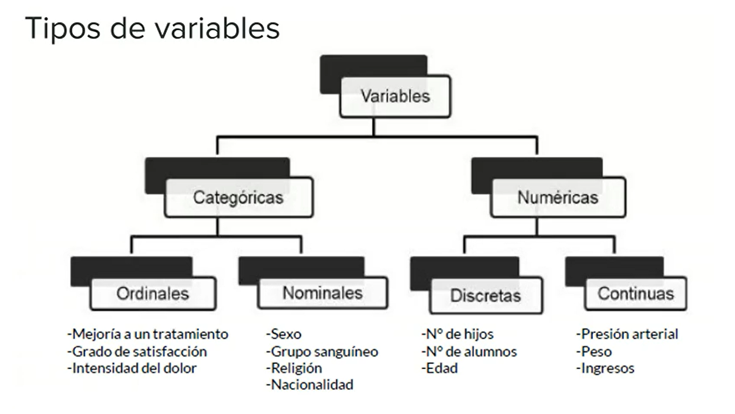

<PRE>
Variables in explanatory data analysis can be classified into different types based on their nature and the kind 
of data they represent. 
The main types of variables are:

1. Categorical Variables:

    Nominal: Qualitative data without any inherent order or ranking (e.g., gender, colors, musical genres).
    
    Ordinal: Qualitative data with a specific order or ranking (e.g., ratings - low, medium, high).

2. Numerical Variables:
    
    Discrete: Quantitative data that take on a countable set of values (e.g., counts, whole numbers).
    
    Continuous: Quantitative data that can take any value within a given range (e.g., height, weight).

3. Time-related Variables:

    Interval: Time or numerical data where the difference between values is consistent, but there's no true zero point 
              (e.g., temperature in Celsius or Fahrenheit).
    
    Ratio: Time or numerical data with a true zero point, where ratios and proportions make sense (e.g., age, income).

4. Derived Variables:
    
    Composite or Derived: Variables created from the original data through calculations or transformations 
                          (e.g., percentages, averages, ratios).

5. Univariate vs. Multivariate Variables:
    
    Univariate: Variables analyzed individually to understand their distributions and characteristics.

    Multivariate: Analysis involving relationships between multiple variables simultaneously (e.g., correlations, regressions).
    
    Understanding the types of variables helps in choosing appropriate statistical techniques and visualization methods during 
    data exploration. 
    For instance,  different visualizations (e.g., histograms, bar plots, box plots) are suitable for different 
    variable types, aiding in better interpretation and analysis.

During an explanatory data analysis, identifying and appropriately handling these variable types are crucial 
for uncovering patterns, relationships, and insights within the data.
<PRE>

**Dataset:**  Hot_Stuff.csv  

**Descripción:** This file provides information about each song's position on that week's Hot 100 singles chart

**Periodo:**  From 01/01/1963 to 31/12/2023

<h1>df_Hot_Stuff</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>url</td><td>URL of the song</td><td>string</td><td>1</td><td></td></tr>
<tr><td>WeekID</td><td>Date of the song</td><td>string</td><td>2</td><td></td></tr>
<tr><td>Week Position</td><td>Position on the chart </td><td>string</td><td>2</td><td></td></tr>
<tr><td>Song</td><td>Title of the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Performer</td><td>Artist or band that performs the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Instance</td><td>Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
            appeared for the sixth time).</td><td>string</td><td>2</td><td></td></tr>
<tr><td>Previous Week Position</td><td>URL of the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Peak Position</td><td>The highest position reached by a particular song on any given week's chart</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Weeks on Chart</td><td>Represents how many weeks a specific entry has spent on the chart so far</td><td>string</td><td>2</td><td></td></tr>
</table>

 <pre>
 WeekID: The week identifier.
 Song name: The name of the song.
 Performer name: The name of the performer or artist.
 Current week on chart: Represents how many weeks the song has been on the chart at that particular point in time.
 Instance: Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
           appeared for the sixth time).
 Previous week position: The position of the song on the previous week's chart.
 Peak Position: The highest position reached by a particular song on any given week's chart.
 Weeks on Chart: Represents how many weeks a specific entry has spent on the chart so far.
</pre>

**Dataset:**  df_genres_20231228_2104_without_column_unknown.csv

**Descripción:** Listado con songID y los 50 géneros musicales de Spotify a True or False

**Periodo:**  De 01/01/1963 a 31/12/2013

<h1>df_genres_modificado</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Multiple names of genres</td><td>False or True depending of the genre that is on the next column</td><td>Binaria</td><td>0</td><td></td></tr>
<tr><td>spotify_genre_list</td><td>List of genres of the song</td><td>Categórica nominal</td><td>2</td><td></td></tr>
</table>

**Dataset:**  Hot_100_Audio_Features.csv  
**Descripción:** This file provides detailed audio features for each song extracted from Spotify using the Spotify Web API.  
**Periodo:**  From 01/01/1963 to 31/12/2023 

<h1>df_Hot_100_Audio_Features</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Performer</td><td>Artist or band that performs the song</td><td>Categórica nominal</td><td>0</td><td></td></tr>
<tr><td>Song</td><td>Name of the song</td><td>Categórica</td><td>1</td><td></td></tr>
<tr><td>spotify_genre</td><td>genre according to Spotify</td><td>Categórica</td><td>1</td><td></td></tr>
<tr><td>spotify_track_id</td><td>ID of the track on Spotify</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_preview_url</td><td>URL of the song at Spotify</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_duration_ms</td><td>Duration in ms of the song</td><td>Categórica</td><td>0</td><td></td></tr>
<tr><td>spotify_track_explicit</td><td>Unknown</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_album</td><td>URL of the song</td><td>Categórica</td><td>0</td><td></td></tr>
<tr><td>danceability</td><td>describing how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity.</td><td>Numérica continua</td><td>1</td><td></td></tr>
<tr><td>energy</td><td>representing "a perceptual measure of intensity and activity", based on the track's dynamic range, perceived loudness, timbre, onset rate, and general entropy</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>key</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>loudness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>mode</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>speechiness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>acousticness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>instrumentalness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>liveness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>valence</td><td>describing "the musical positiveness of the track". Generally speaking, tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while songs with low valence sound more negative (e.g., sad, depressed, angry)</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>tempo</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>time_signature</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_popularity</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
</table>

<pre>
SongID
Performer
Song
spotify_genre
spotify_track_id
spotify_track_preview_url
spotify_track_duration_ms
spotify_track_explicit
spotify_track_album
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
spotify_track_popularity
</pre>

In [ ]:
df_tipificacion_df_Hot_Stuff = pd.DataFrame([df_Hot_Stuff.nunique(), df_Hot_Stuff.nunique()/len(df_Hot_Stuff) * 100, df_Hot_Stuff.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_Stuff["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_Stuff

In [ ]:

df_tipificacion_df_Hot_100_Audio_Features_genres_EDA = pd.DataFrame([df_Hot_100_Audio_Features_genres_EDA.nunique(), df_Hot_100_Audio_Features_genres_EDA.nunique()/len(df_Hot_100_Audio_Features_genres_EDA) * 100, df_Hot_100_Audio_Features_genres_EDA.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA

In [ ]:
df_tipificacion_df_Hot_Audio_Features= pd.DataFrame([df_Hot_100_Audio_Features.nunique(), df_Hot_100_Audio_Features.nunique()/len(df_Hot_100_Audio_Features) * 100, df_Hot_100_Audio_Features.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_Audio_Features
df_tipificacion_df_Hot_Audio_Features["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_Audio_Features

In [ ]:
# Siguiente dataset...
# df_2.head()
df_Hot_100_Audio_Features_genres_EDA = df_genres_modificado.copy()
genres=['mellow_gold','soft_rock','adult_standards','brill_building_pop','rock','dance_pop','pop','soul','motown','pop_rap','rap','folk_rock','album_rock','classic_rock','quiet_storm','hip_hop','rock-and-roll','bubblegum_pop','funk','classic_soul','urban_contemporary','country','r&b','disco','post-teen_pop','new_wave_pop','contemporary_country','country_rock','country_road','southern_soul','trap','folk','pop_rock','southern_hip_hop','hard_rock','lounge','hip_pop','rockabilly','rhythm_and_blues','art_rock','dance_rock','merseybeat','new_jack_swing','easy_listening','doo-wop','classic_uk_pop','psychedelic_rock','gangster_rap','roots_rock']
genre_counts = df_Hot_100_Audio_Features_genres_EDA[genres].sum().reset_index()
genre_counts.columns = ['Genre', 'Count']
#df_genres_totals = pd.DataFrame(dict_genres_totals)
genre_counts
#in groups of five years

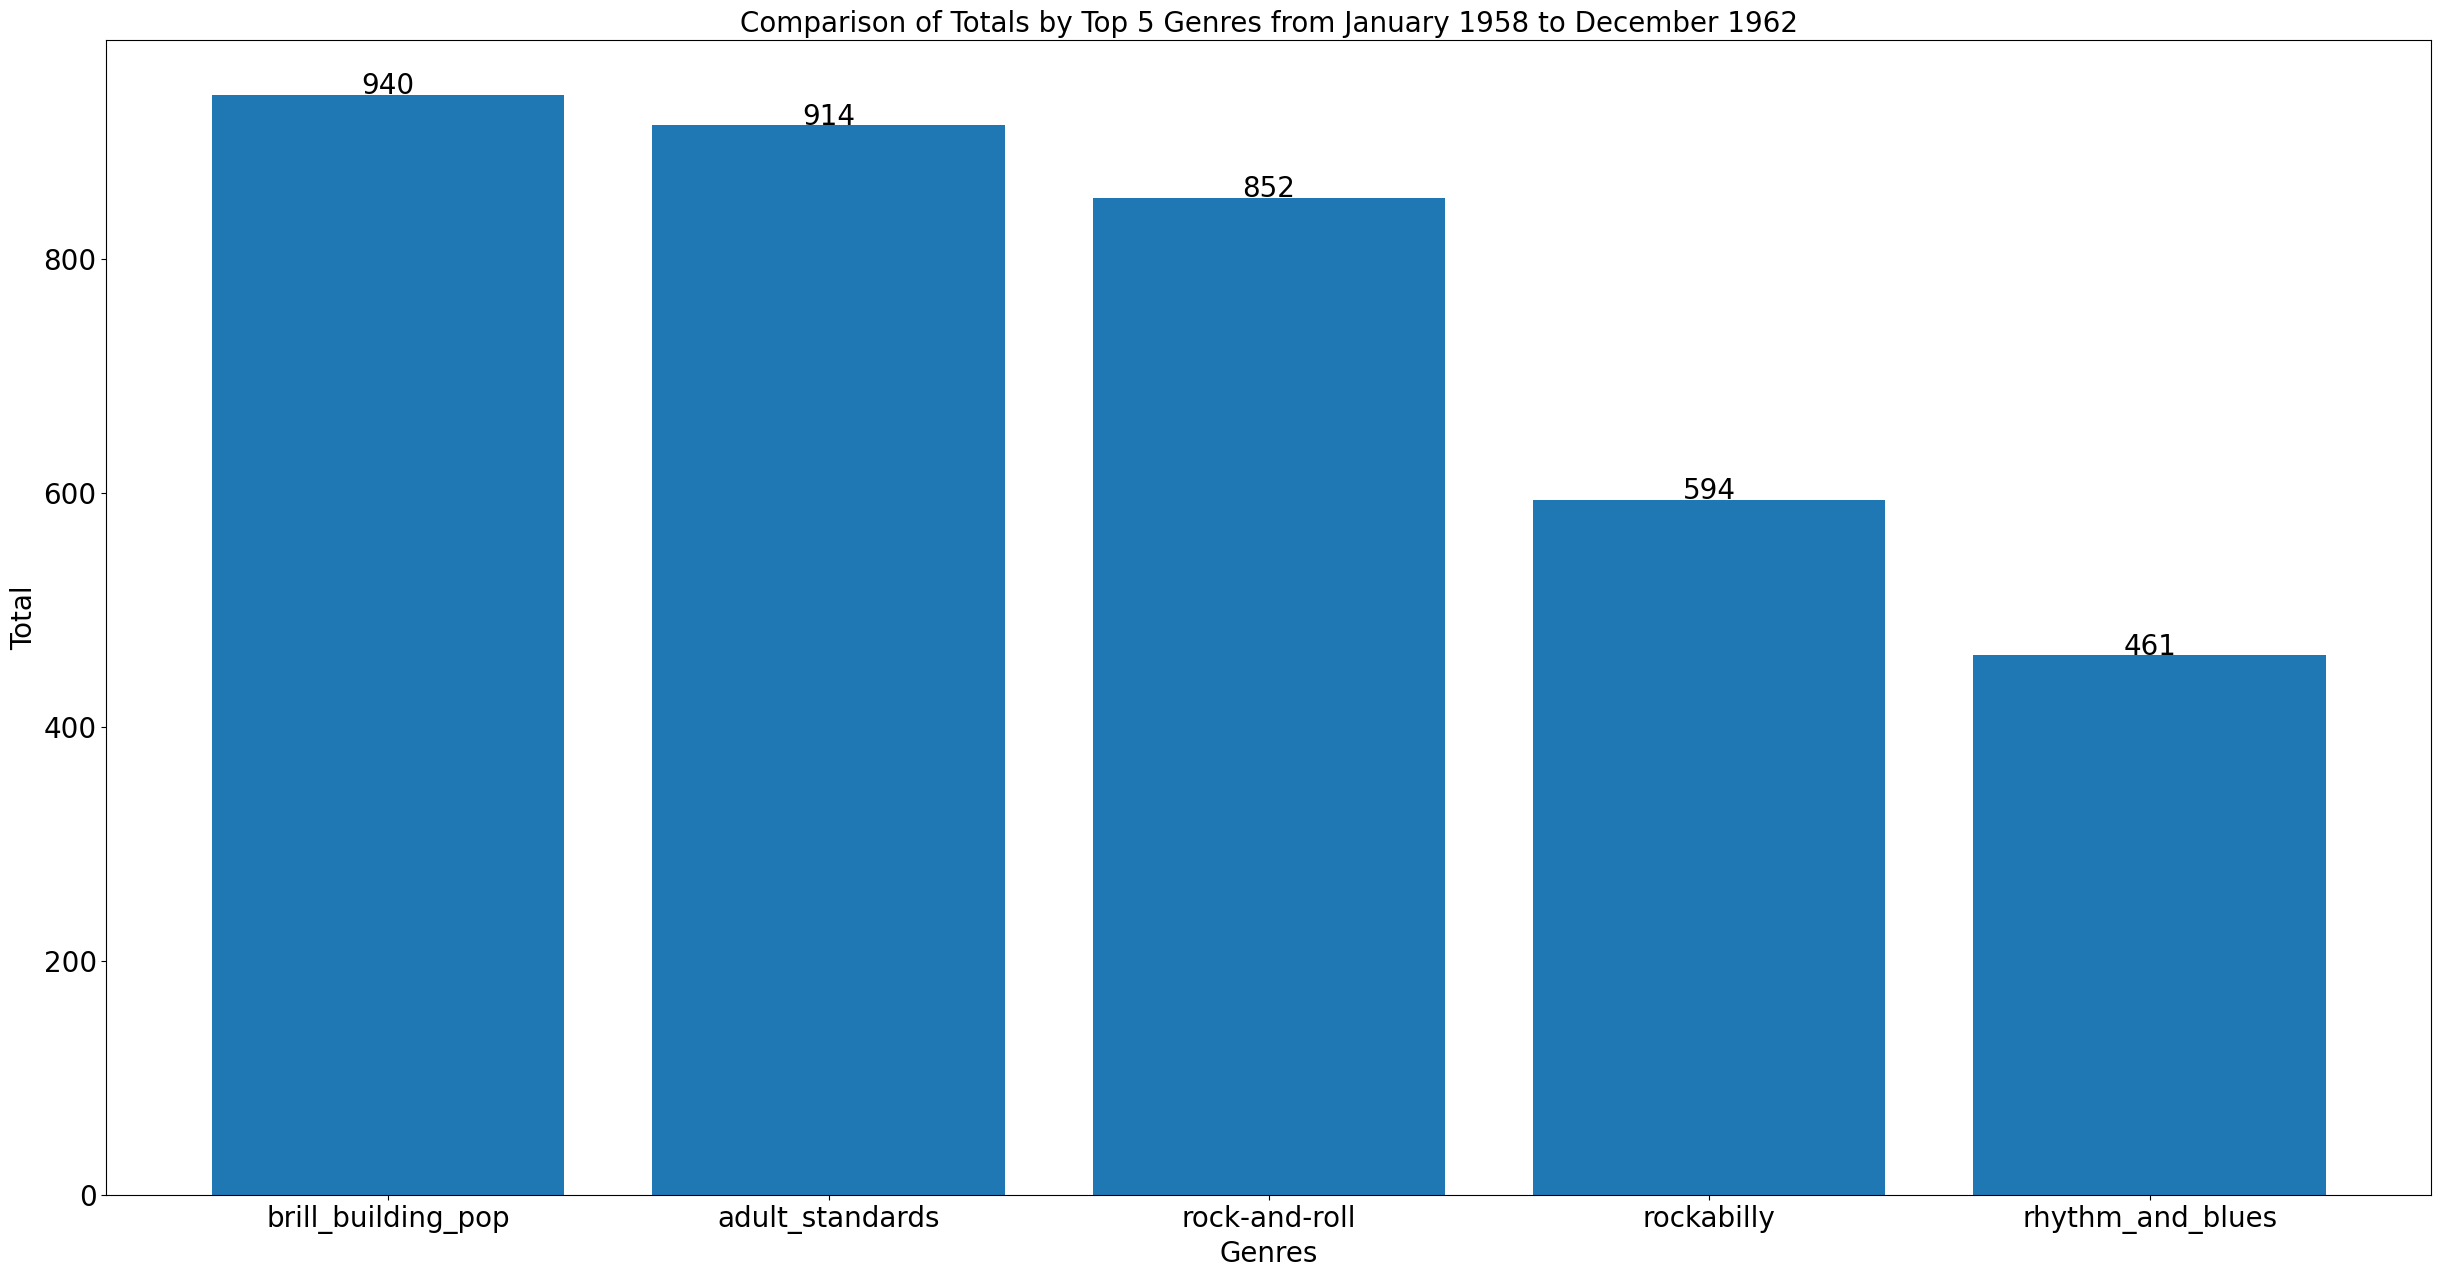

brill_building_pop has this performers with a TOP 1 song:	
The Everly Brothers with song ('til) I Kissed You
, Paul Anka with song (All of a Sudden) My Heart Sings
, Chubby Checker with song (Dance The) Mess Around
, Connie Francis with song (He's My) Dreamboat
, The Fleetwoods with song (He's) The Great Impostor
, Gene Chandler with song (I'm Just A) Fool For You
, The Drifters with song (If You Cry) True Love, True Love
, Roy Orbison with song (Say) You're My Girl
, Brian Hyland with song (The Clickity Clack Song) Four Little Heels
, Bobby Vee with song (There'll Come A Day When) Ev'ry Little Bit Hurts


adult_standards has this performers with a TOP 1 song:	
The Everly Brothers with song ('til) I Kissed You
, Paul Anka with song (All of a Sudden) My Heart Sings
, Chubby Checker with song (Dance The) Mess Around
, Connie Francis with song (He's My) Dreamboat
, The Fleetwoods with song (He's) The Great Impostor
, The Drifters with song (If You Cry) True Love, True Love
, Roy Orbison w

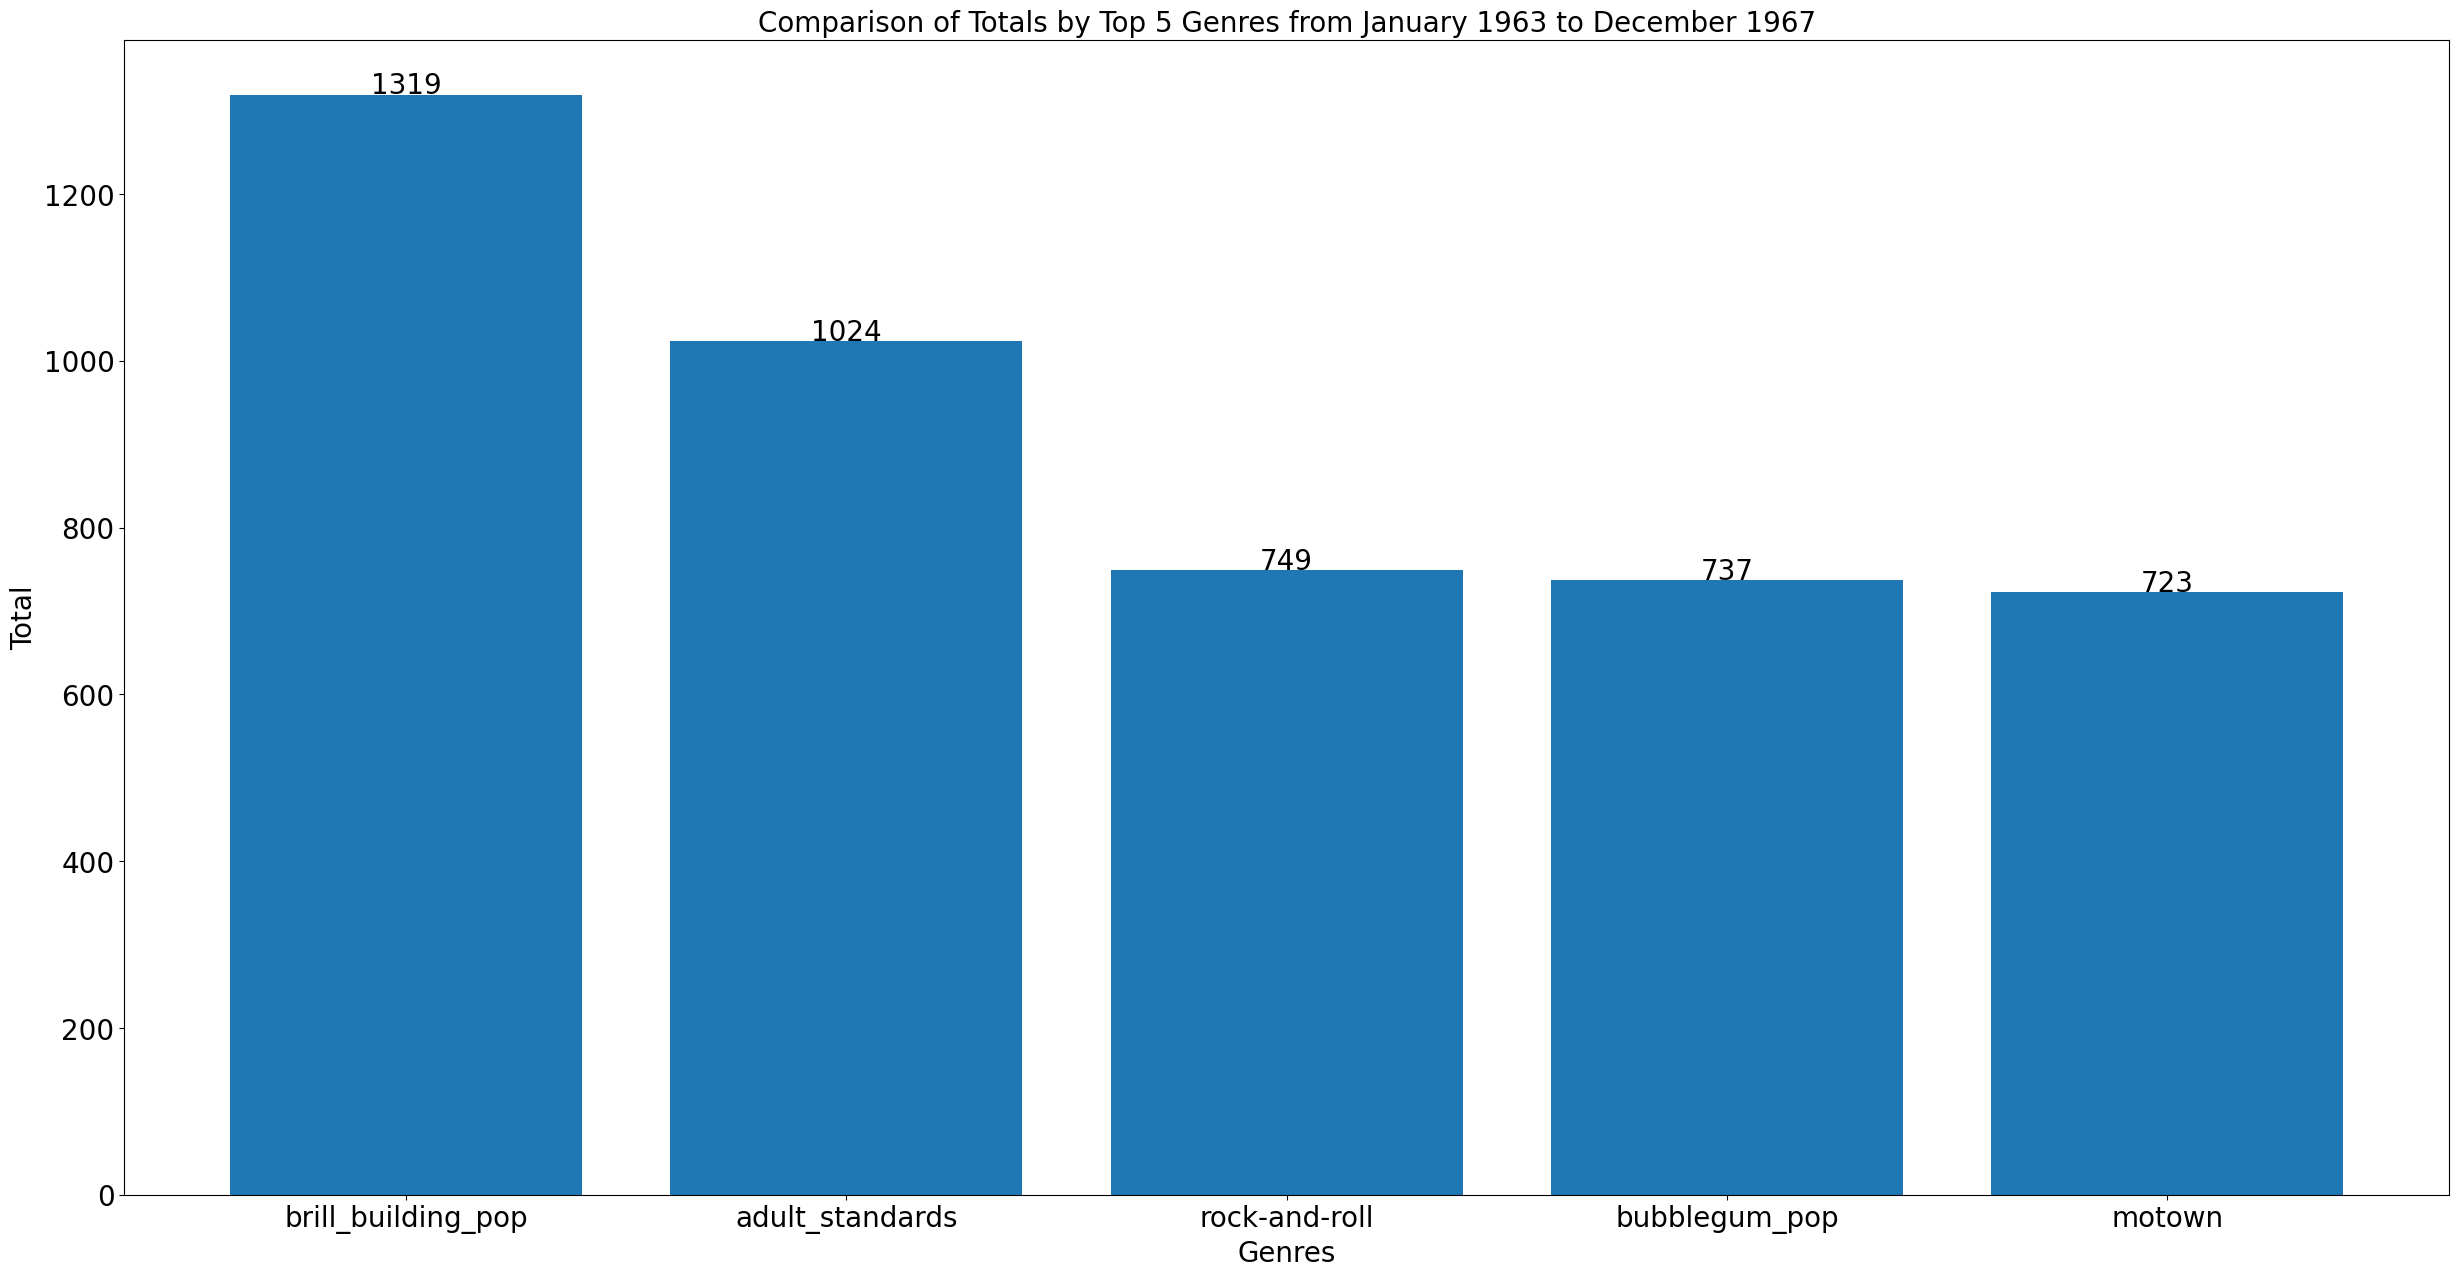

brill_building_pop has this performers with a TOP 1 song:	
Steve Lawrence with song (I Don't Care) Only Love Me
, The Temptations with song (I Know) I'm Losing You
, Johnny Rivers with song (I Washed My Hands In) Muddy Water
, The Monkees with song (I'm Not Your) Steppin' Stone
, Little Peggy March with song (I'm Watching) Every Little Move You Make
, Four Tops with song (It's The Way) Nature Planned It
, Gary Lewis And The Playboys with song (You Don't Have To) Paint Me A Picture
, The McCoys with song (You Make Me Feel) So Good
, The Righteous Brothers with song (You're My) Soul And Inspiration
, Nancy Sinatra with song 100 Years


adult_standards has this performers with a TOP 1 song:	
Steve Lawrence with song (I Don't Care) Only Love Me
, The Temptations with song (I Know) I'm Losing You
, Four Tops with song (It's The Way) Nature Planned It
, Dean Martin with song (Open Up The Door) Let The Good Times In
, Gary Lewis And The Playboys with song (You Don't Have To) Paint Me A Pictur

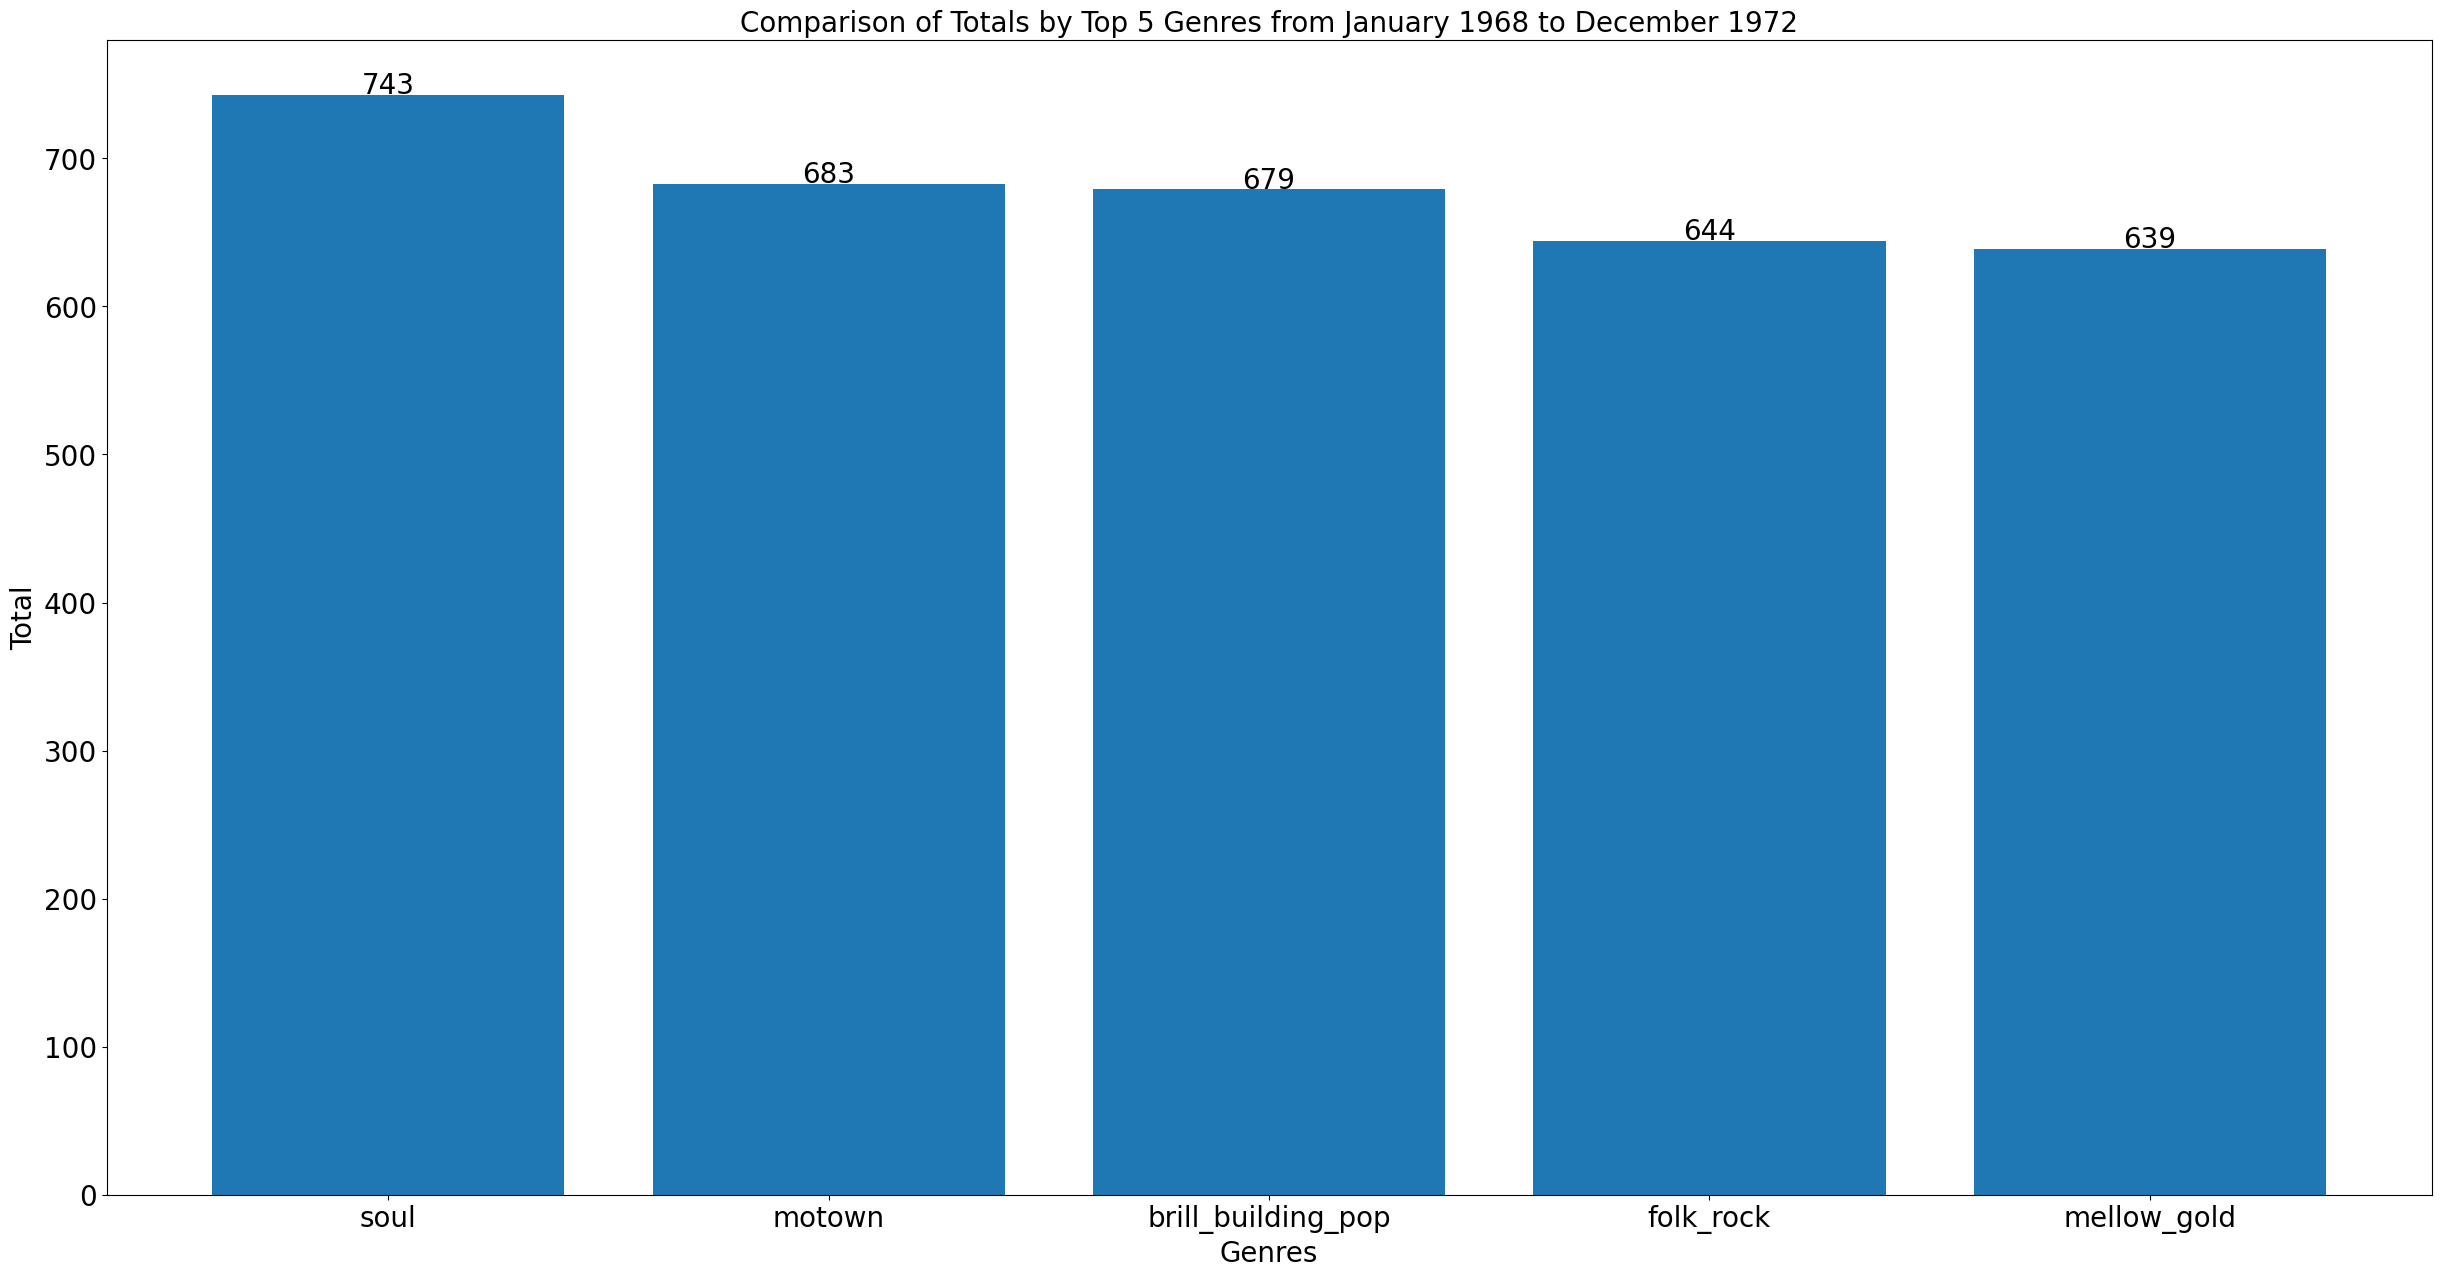

soul has this performers with a TOP 1 song:	
Isaac Hayes with song "Joy" Pt. I
, The Chi-lites with song (For God's Sake) Give More Power To The People
, The Temptations with song (I Know) I'm Losing You
, Otis Redding with song (Sittin' On) The Dock Of The Bay
, Archie Bell & The Drells with song A World Without Music
, Jackson 5 with song ABC
, Smokey Robinson & The Miracles with song Abraham, Martin And John
, Edwin Starr with song Abyssinia Jones
, Marvin Gaye with song After The Dance
, Diana Ross with song Ain't No Mountain High Enough


motown has this performers with a TOP 1 song:	
Isaac Hayes with song "Joy" Pt. I
, The Chi-lites with song (For God's Sake) Give More Power To The People
, The Temptations with song (I Know) I'm Losing You
, The 5th Dimension with song (Last Night) I Didn't Get To Sleep At All
, The Rascals with song A Beautiful Morning
, Archie Bell & The Drells with song A World Without Music
, Jackson 5 with song ABC
, Smokey Robinson & The Miracles with song 

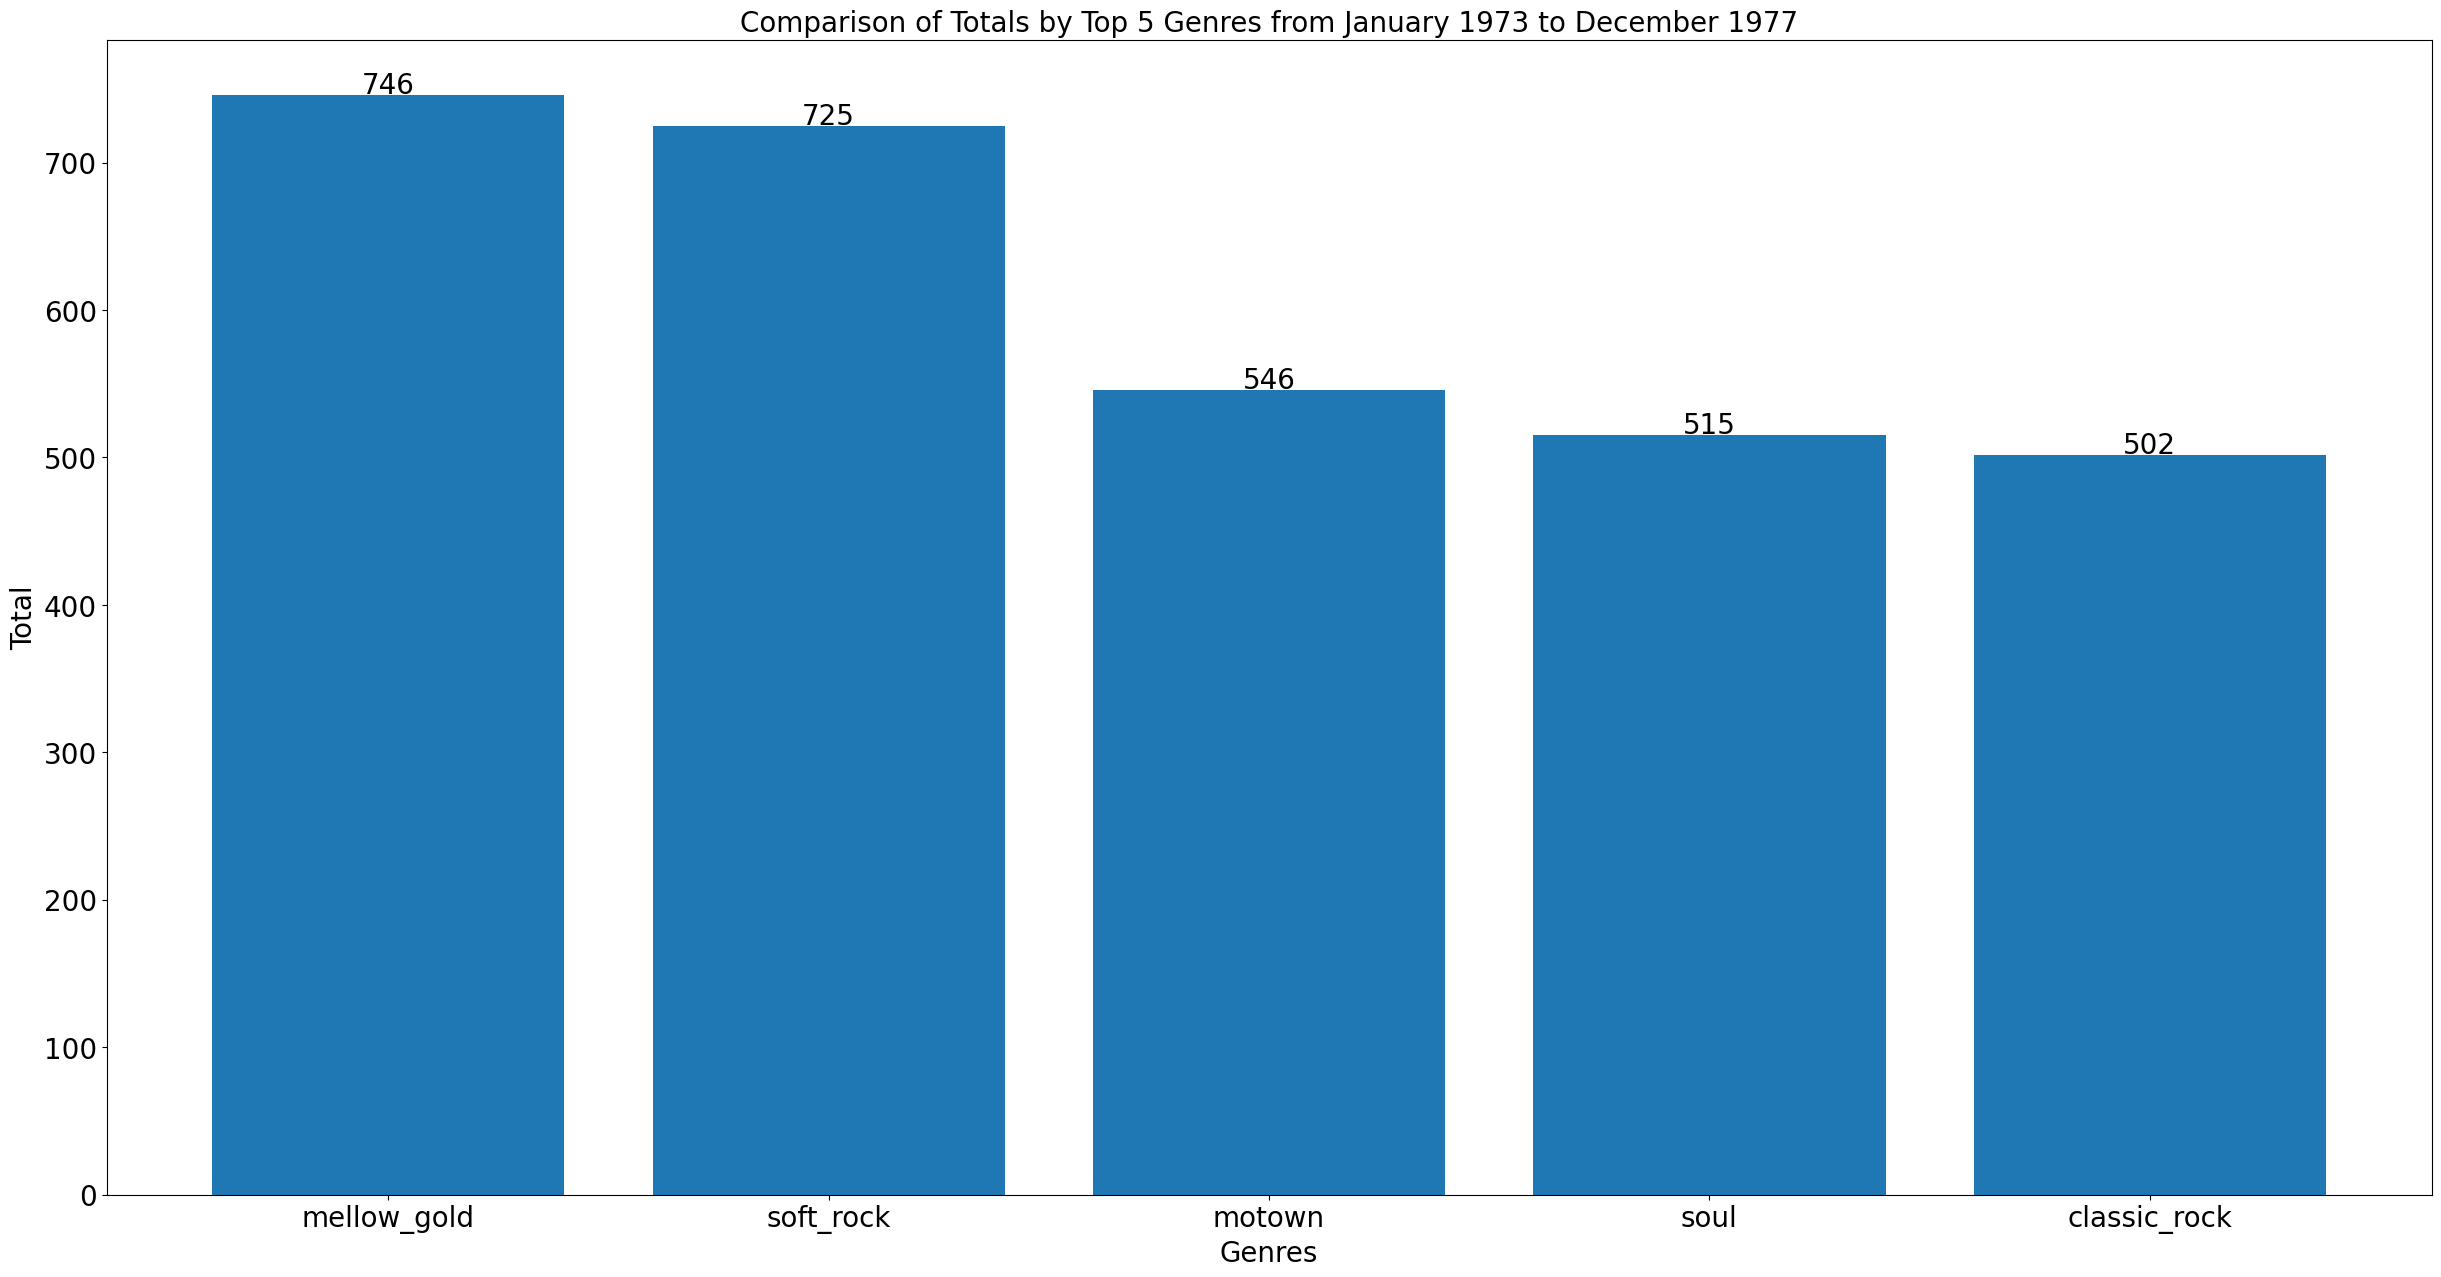

mellow_gold has this performers with a TOP 1 song:	
B.J. Thomas with song (Hey Won't You Play) Another Somebody Done Somebody Wrong Song
, Chicago with song (i've Been) Searchin' So Long
, Andy Gibb with song (Love Is) Thicker Than Water
, Elton John with song (Sartorial Eloquence) Don't Ya Wanna Play This Game No More?
, Linda Ronstadt with song (She's A) Very Lovely Woman/The Long Way Around
, Bee Gees with song (The Lights Went Out In) Massachusetts
, Carpenters with song (They Long To Be) Close To You
, Paul Simon with song 50 Ways To Leave Your Lover
, Ringo Starr with song A Dose Of Rock 'N' Roll
, America with song A Horse With No Name


soft_rock has this performers with a TOP 1 song:	
B.J. Thomas with song (Hey Won't You Play) Another Somebody Done Somebody Wrong Song
, Chicago with song (i've Been) Searchin' So Long
, Andy Gibb with song (Love Is) Thicker Than Water
, KC And The Sunshine Band with song (Shake, Shake, Shake) Shake Your Booty
, Linda Ronstadt with song (She's A

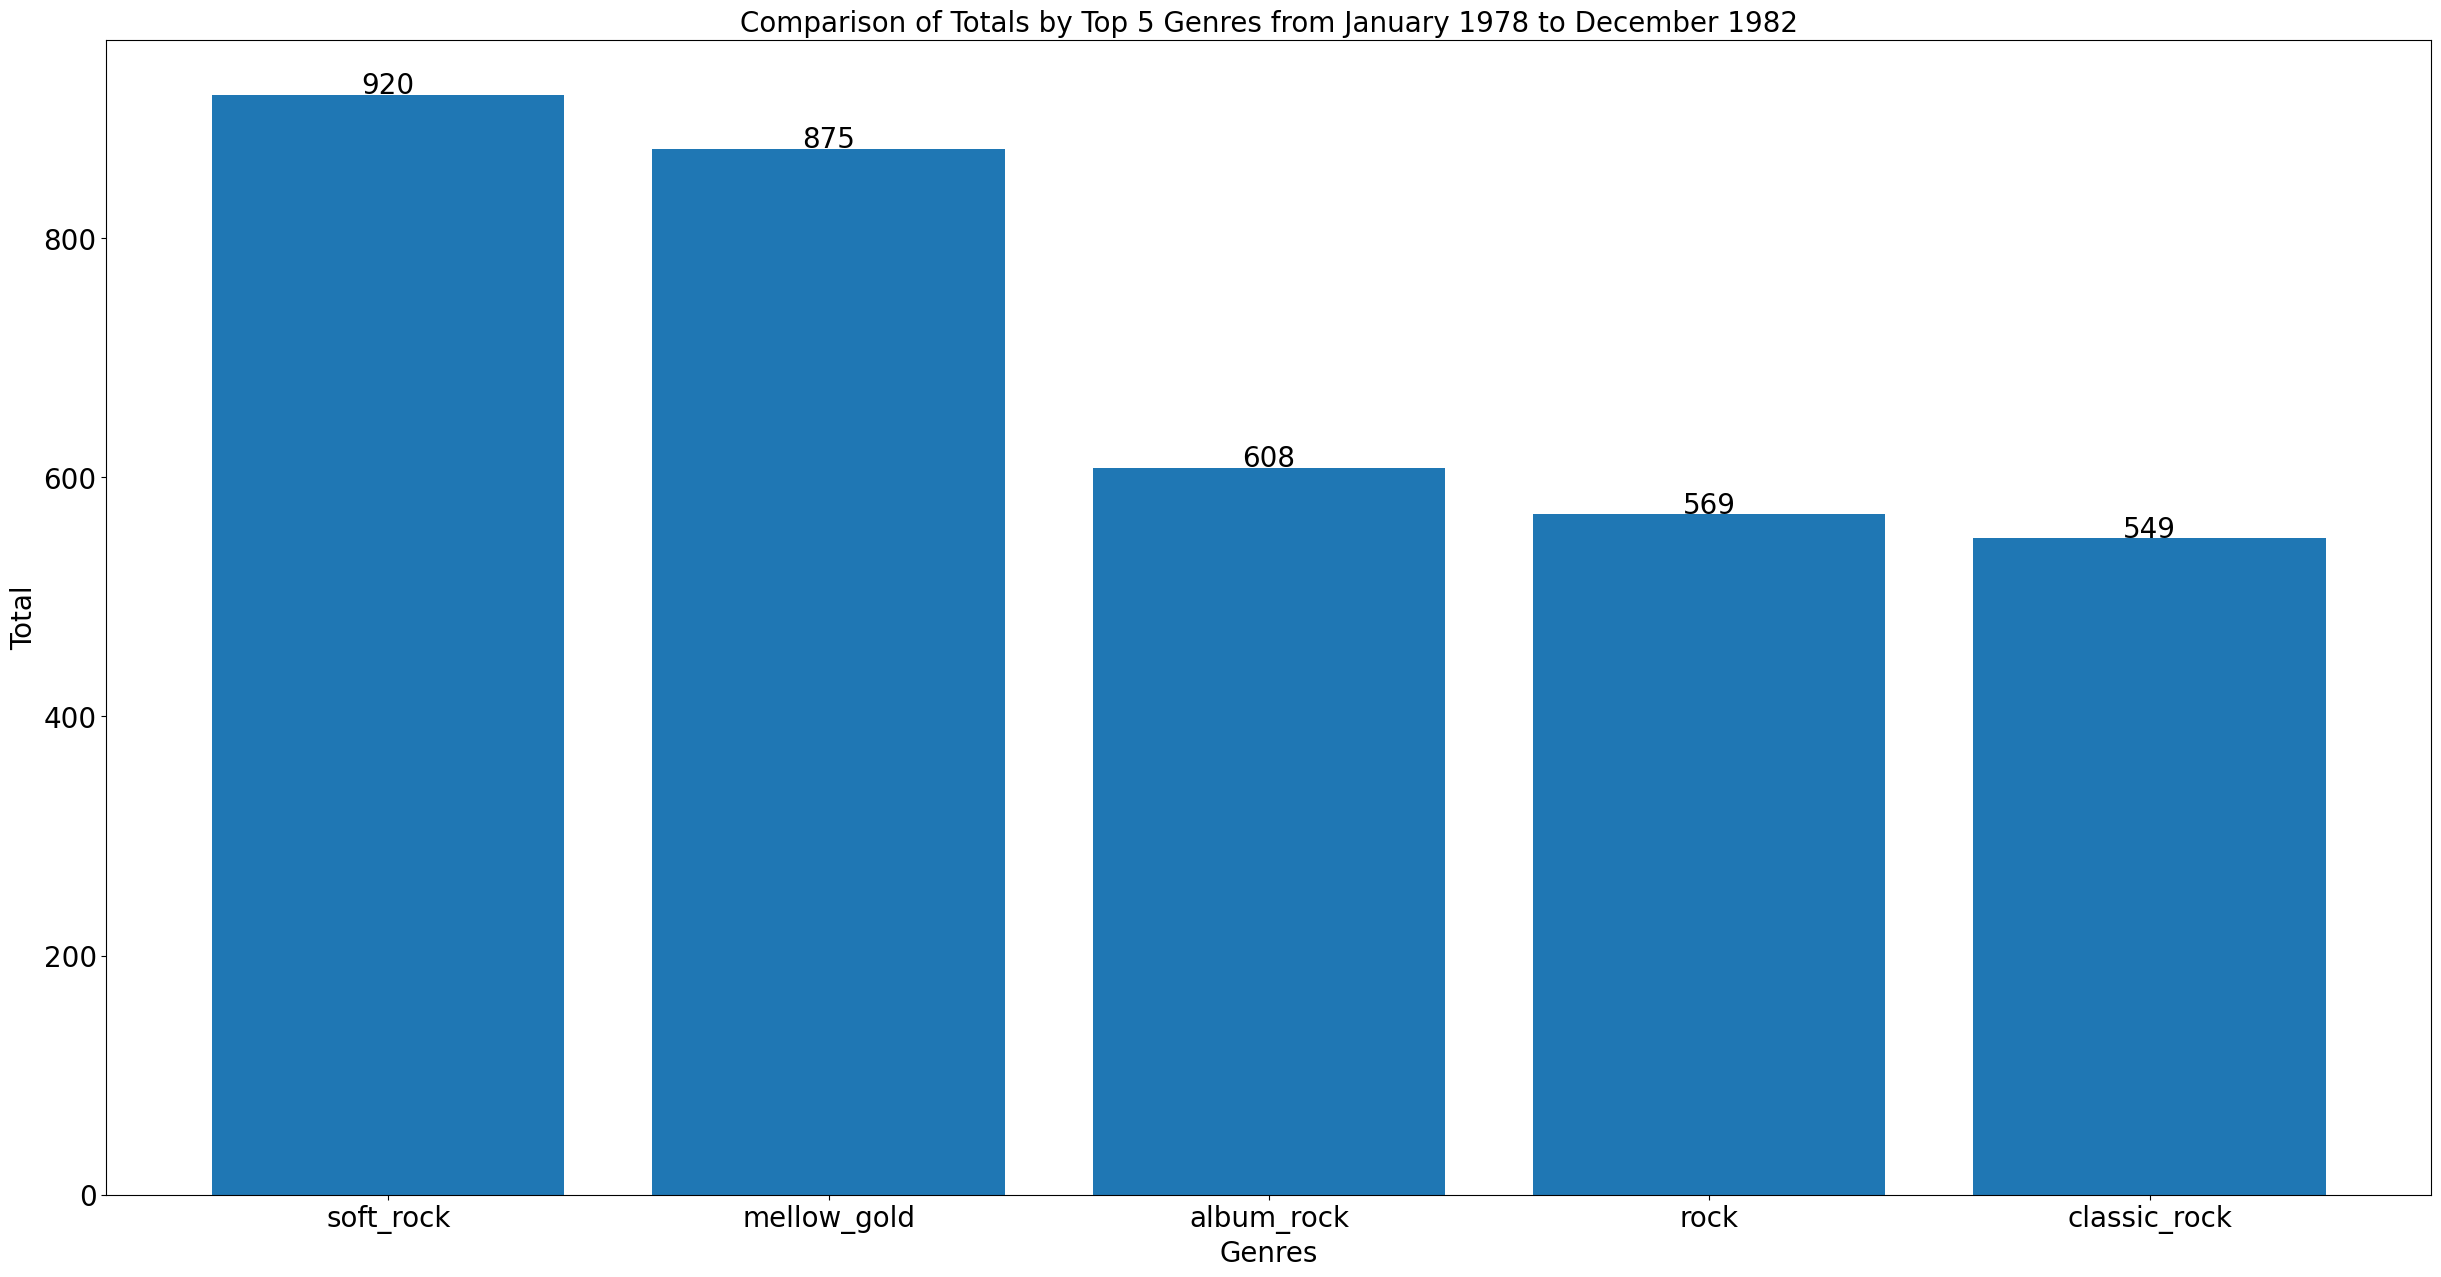

soft_rock has this performers with a TOP 1 song:	
Chicago with song (i've Been) Searchin' So Long
, Andy Gibb with song (Love Is) Thicker Than Water
, KC And The Sunshine Band with song (Shake, Shake, Shake) Shake Your Booty
, Bee Gees with song (The Lights Went Out In) Massachusetts
, Christopher Cross with song A Chance For Heaven
, Anne Murray with song A Little Good News
, Olivia Newton-John with song A Little More Love
, Kenny Rogers with song A Love Song
, Billy Joel with song A Matter Of Trust
, Kim Carnes with song Abadabadango


mellow_gold has this performers with a TOP 1 song:	
Chicago with song (i've Been) Searchin' So Long
, John Lennon with song (Just Like) Starting Over
, Andy Gibb with song (Love Is) Thicker Than Water
, Bee Gees with song (The Lights Went Out In) Massachusetts
, Christopher Cross with song A Chance For Heaven
, Anne Murray with song A Little Good News
, Olivia Newton-John with song A Little More Love
, Kenny Rogers with song A Love Song
, Billy Joel wi

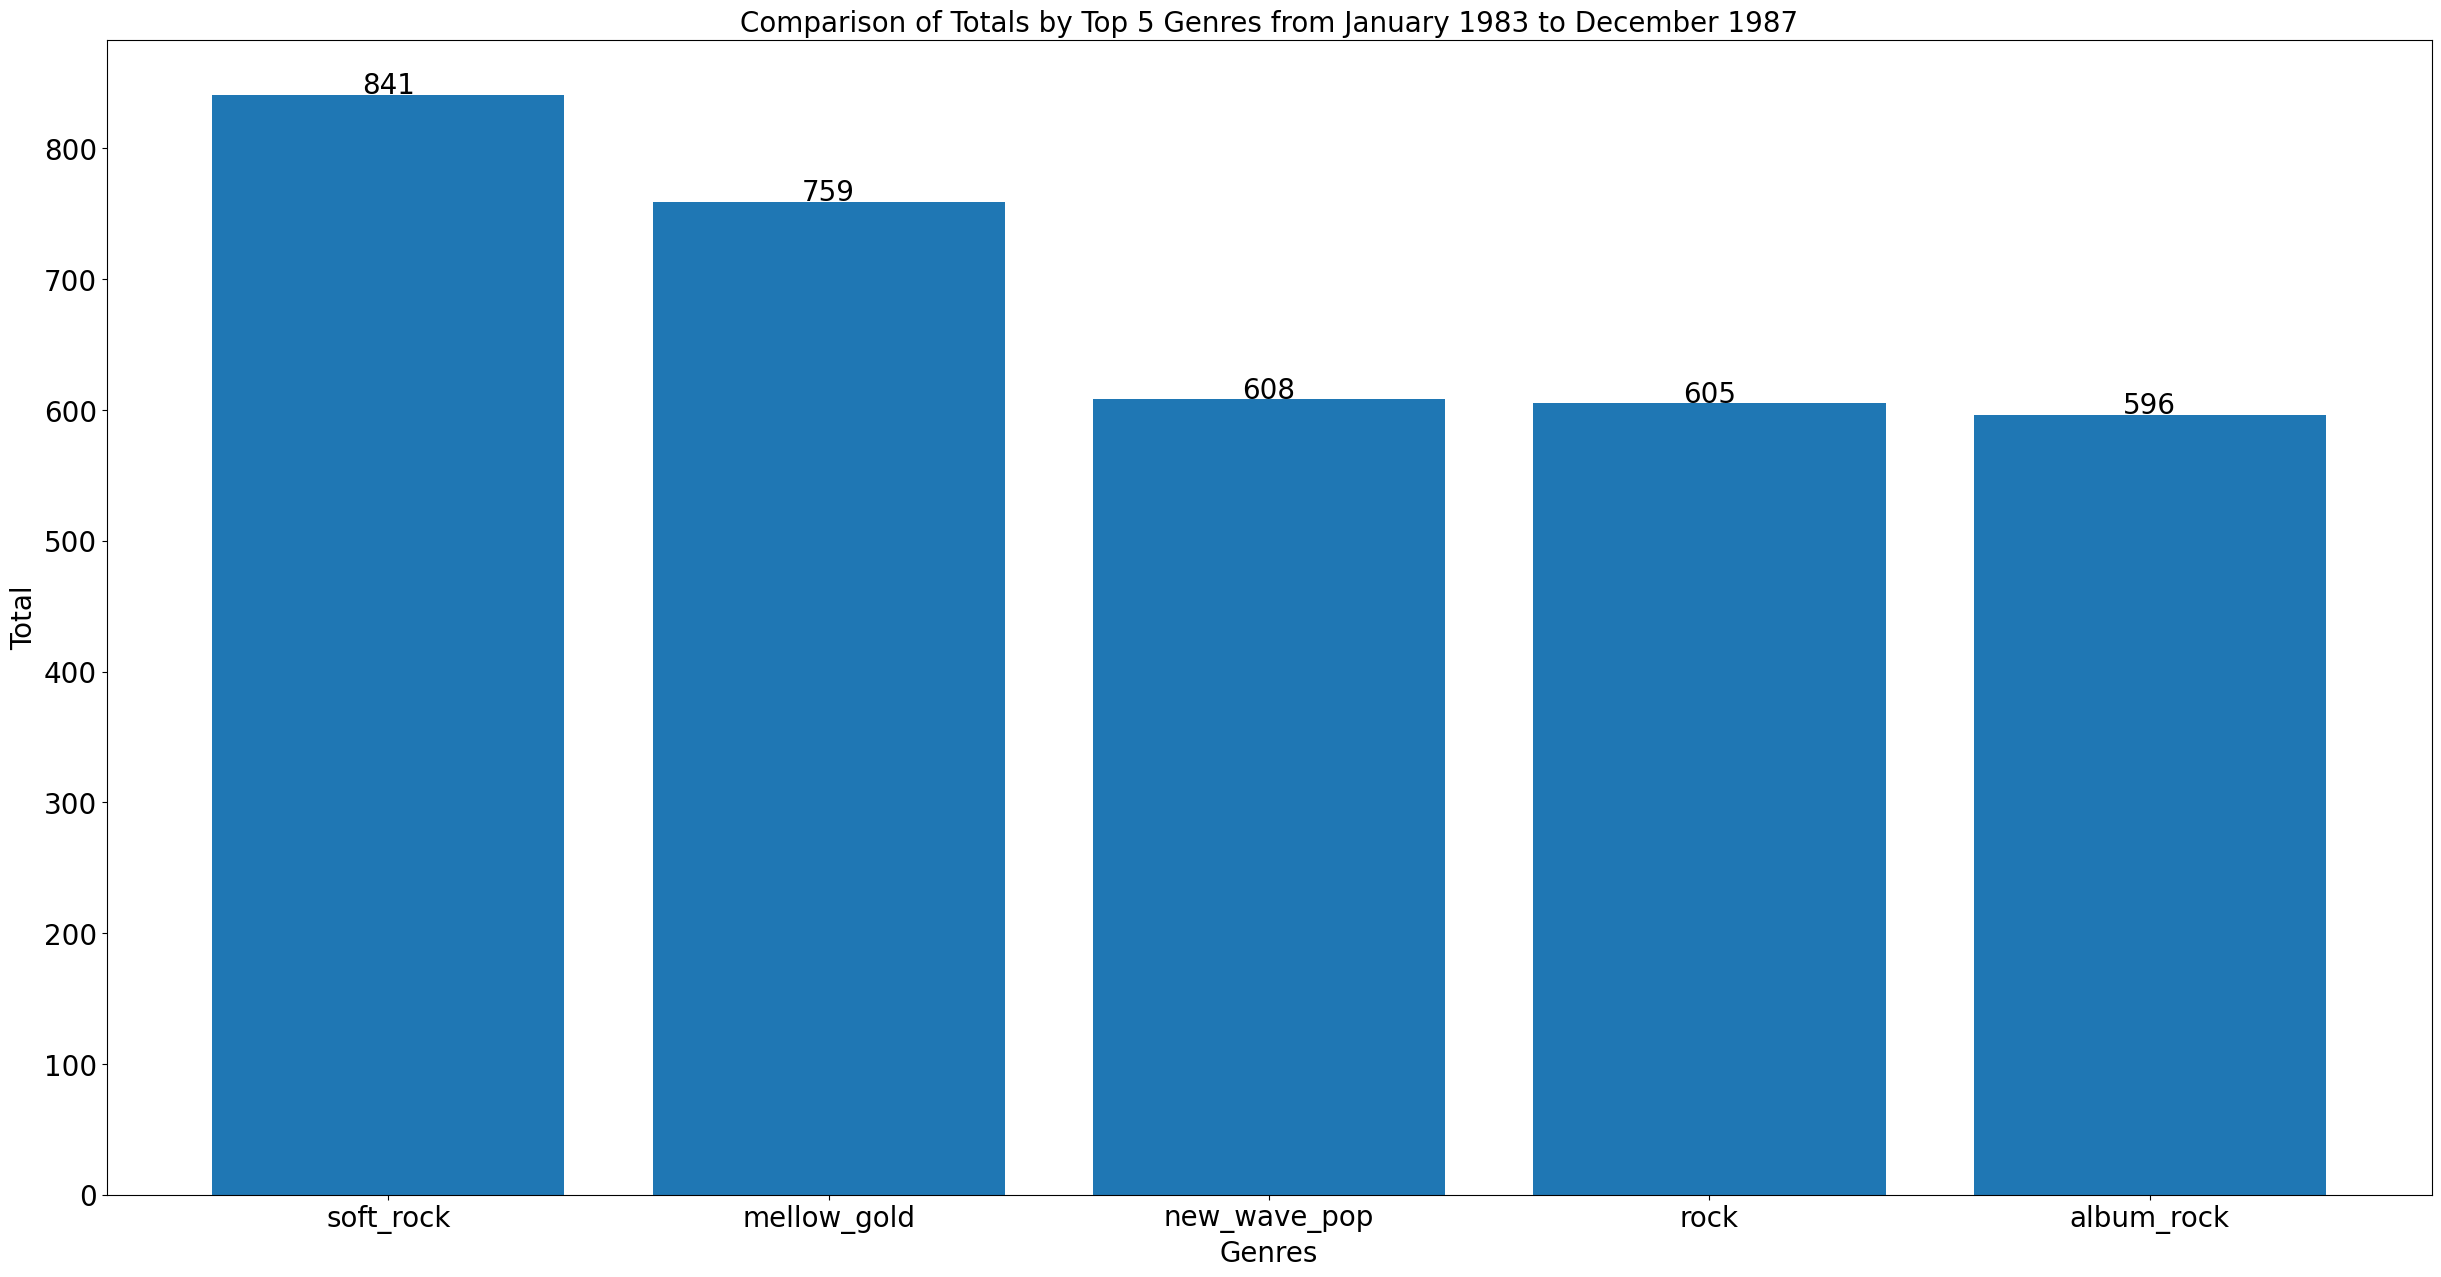

soft_rock has this performers with a TOP 1 song:	
Cutting Crew with song (Between A) Rock And A Hard Place
, Bryan Adams with song (Everything I Do) I Do It For You
, Bill Medley & Jennifer Warnes with song (I've Had) The Time Of My Life
, Duran Duran with song (Reach Up For The) Sunrise
, Huey Lewis & The News with song (She's) Some Kind Of Wonderful
, Toto with song 99
, George Michael with song A Different Corner
, Boston with song A Man I'll Never Be
, Billy Joel with song A Matter Of Trust
, Bananarama with song A Trick Of The Night


mellow_gold has this performers with a TOP 1 song:	
Cutting Crew with song (Between A) Rock And A Hard Place
, Bryan Adams with song (Everything I Do) I Do It For You
, Huey Lewis & The News with song (She's) Some Kind Of Wonderful
, Toto with song 99
, Boston with song A Man I'll Never Be
, Billy Joel with song A Matter Of Trust
, Genesis with song Abacab
, Bruce Hornsby & The Range with song Across The River
, Robert Palmer with song Addicted To Lo

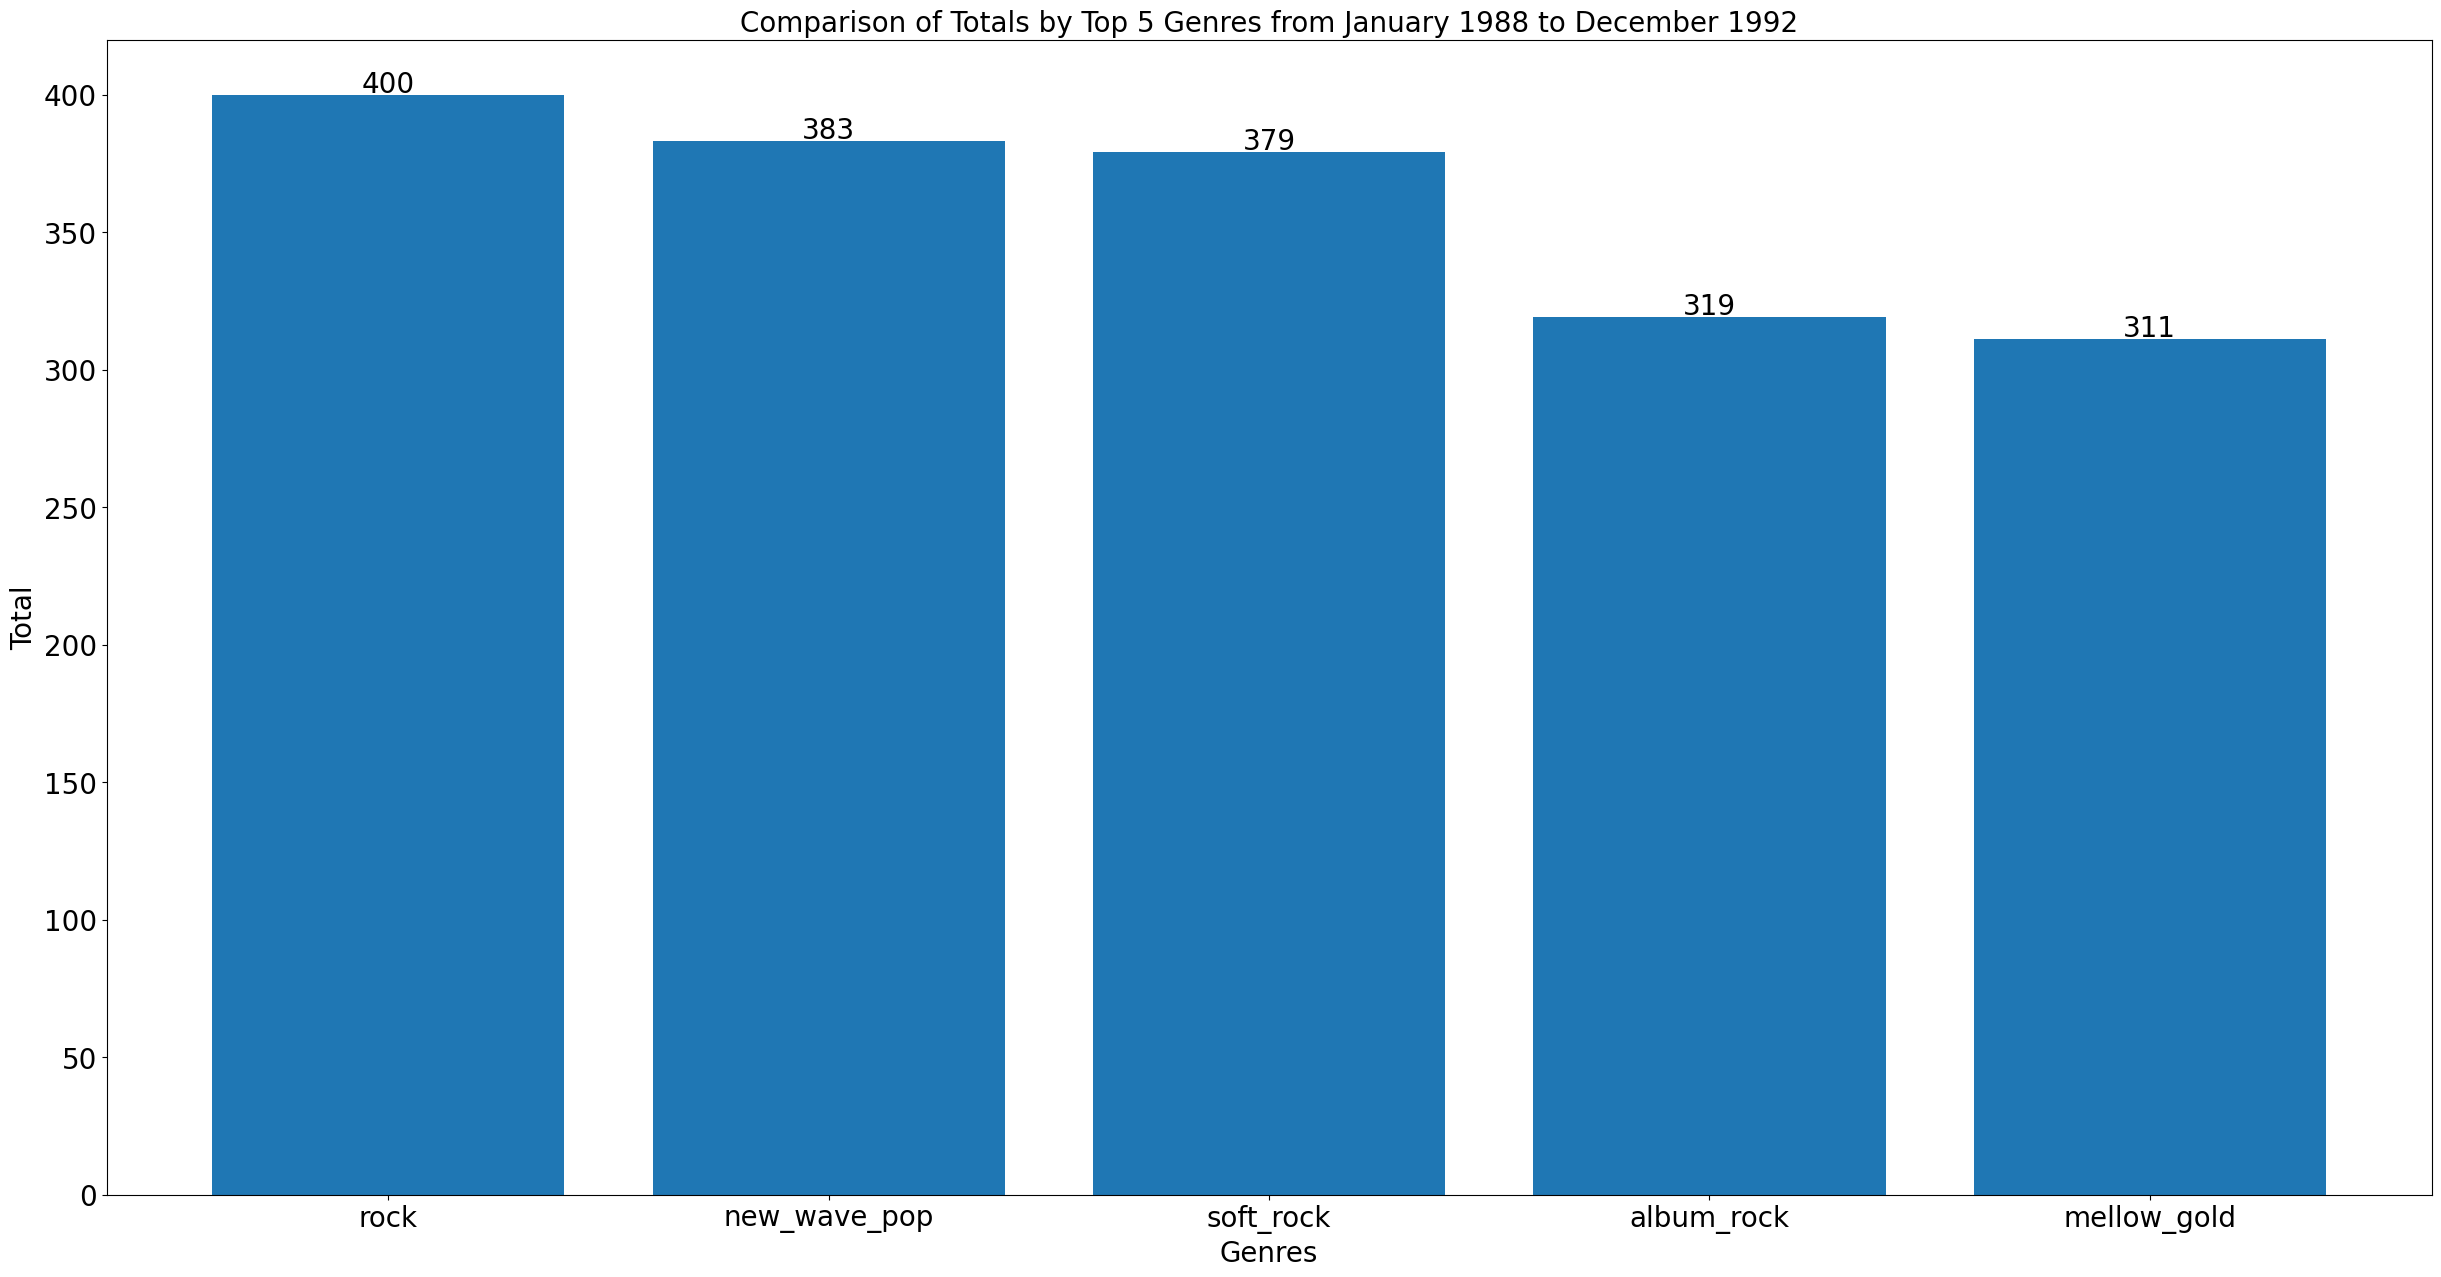

rock has this performers with a TOP 1 song:	
Bryan Adams with song (Everything I Do) I Do It For You
, Chicago with song (i've Been) Searchin' So Long
, Bon Jovi with song (You Want To) Make A Memory
, The Beach Boys with song 409
, Billy Joel with song A Matter Of Trust
, Mr. Big with song Ain't Seen Love Like That
, Cheap Trick with song Ain't That A Shame
, George Harrison with song All Those Years Ago
, Def Leppard with song Animal
, Steve Winwood with song Arc Of A Diver


new_wave_pop has this performers with a TOP 1 song:	
Paula Abdul with song (It's Just) The Way That You Love Me
, Gloria Estefan & Miami Sound Machine with song 01-02-03
, George Michael with song A Different Corner
, Cheap Trick with song Ain't That A Shame
, Rick Astley with song Ain't Too Proud To Beg
, Mike + The Mechanics with song All I Need Is A Miracle
, Bette Midler with song All I Need To Know
, Tiffany with song All This Time
, Roxette with song Almost Unreal (From "Super Mario Bros.")
, Gloria Estefa

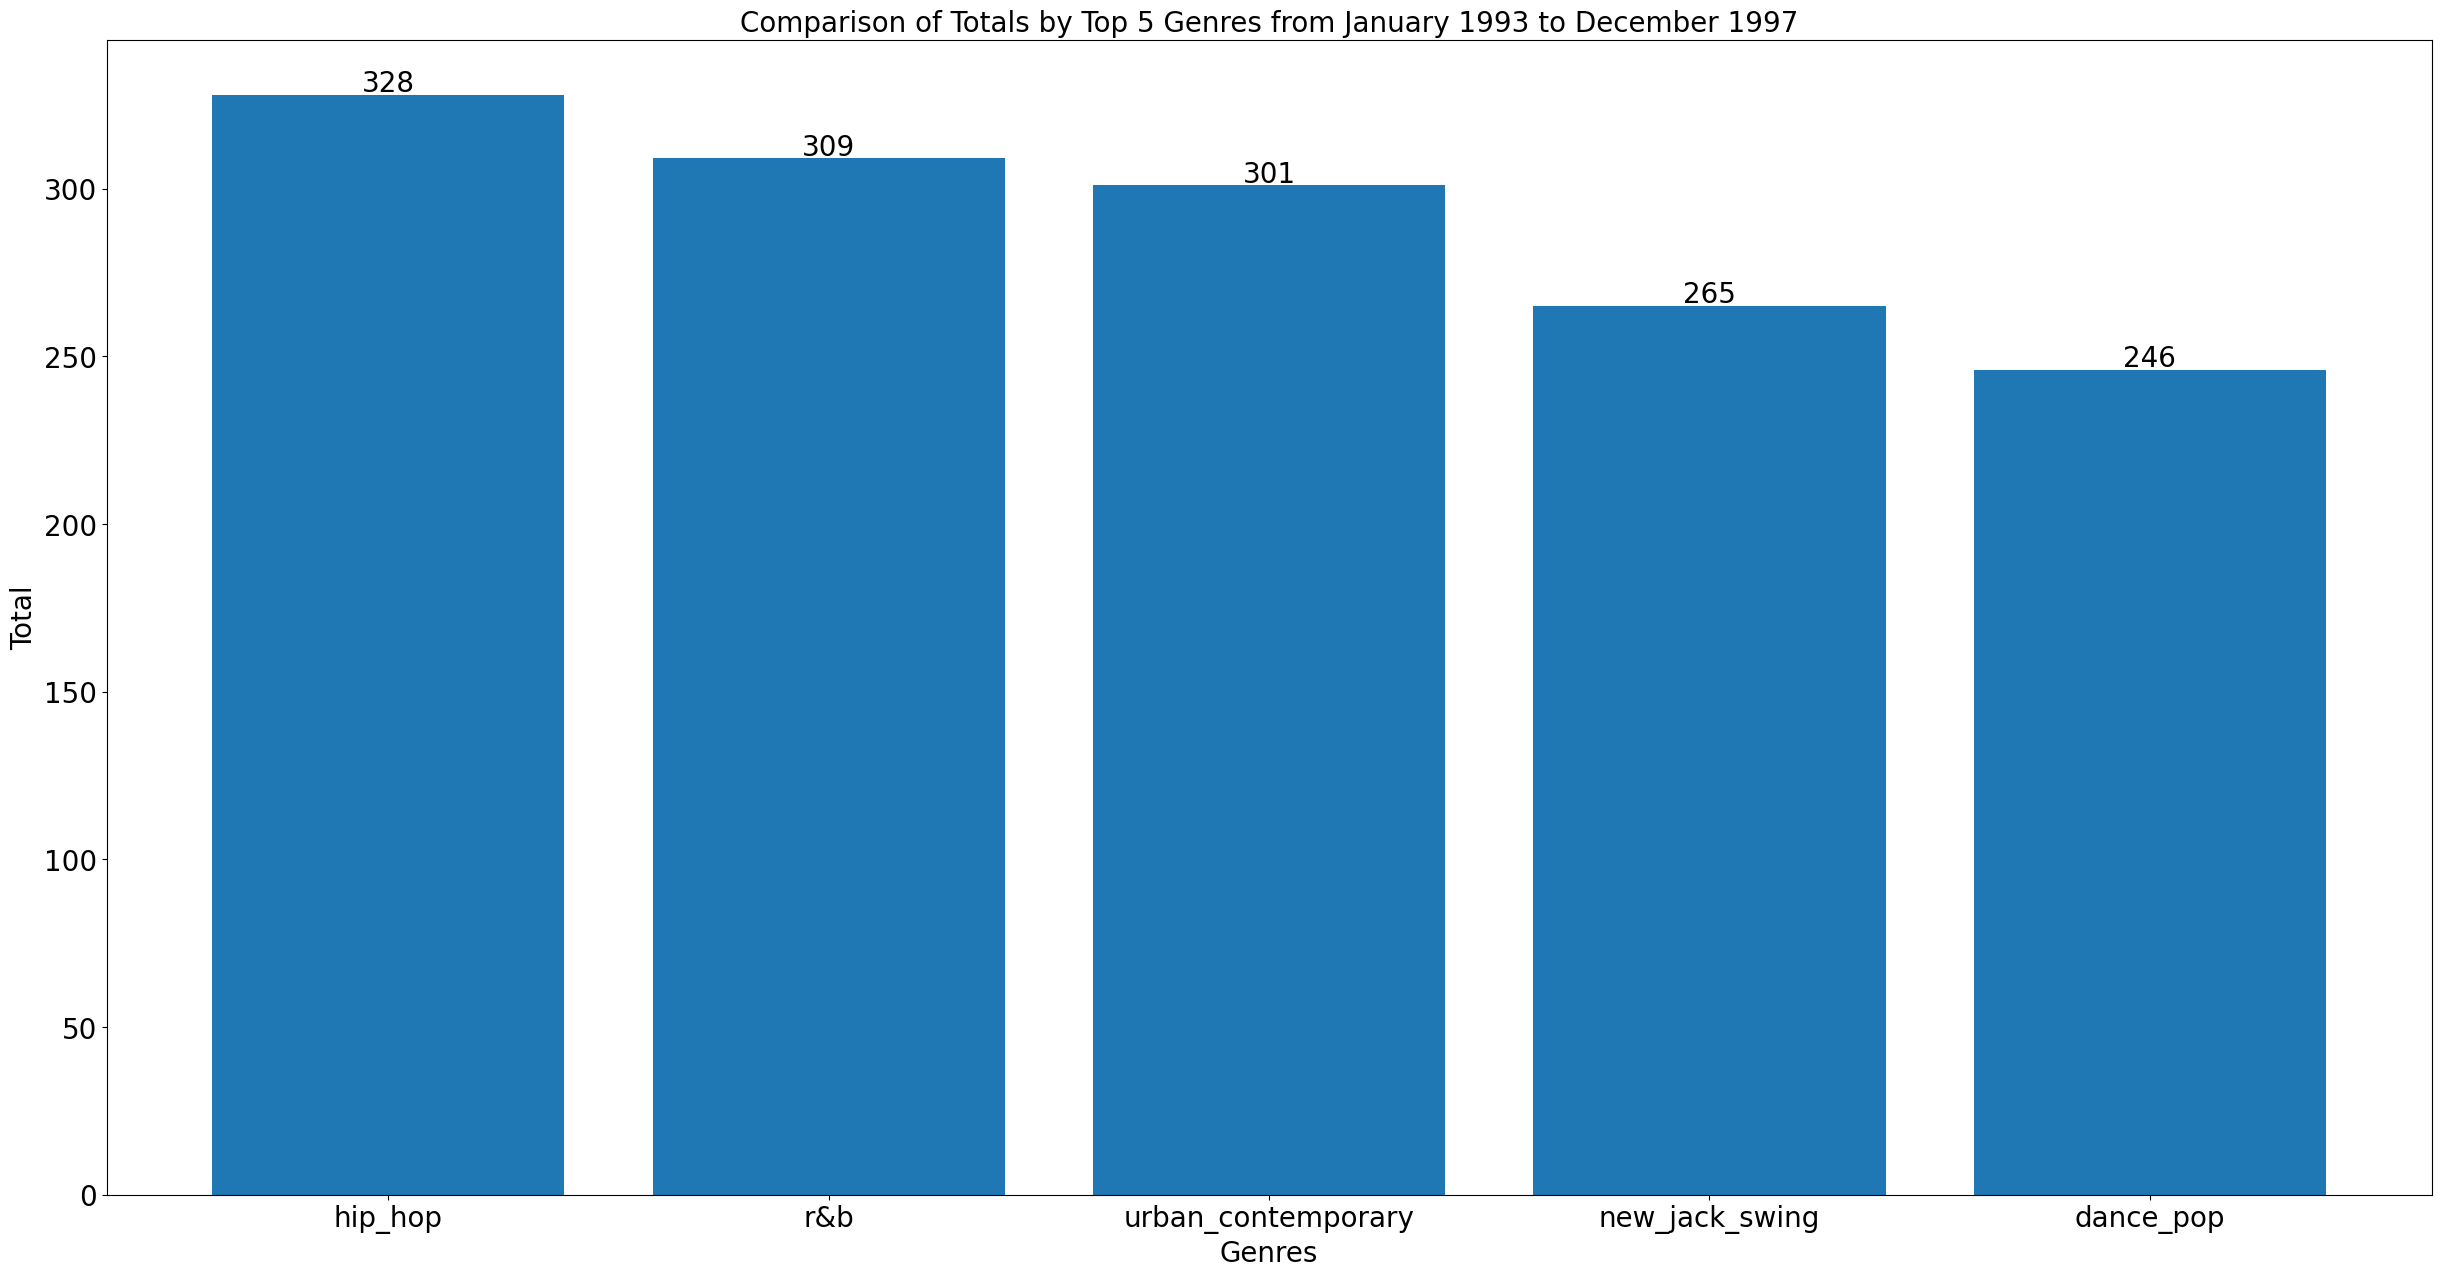

hip_hop has this performers with a TOP 1 song:	
Bone Thugs-N-Harmony with song 1st Of Tha Month
, TLC with song Ain't 2 Proud 2 Beg
, SWV with song Always On My Mind
, The Notorious B.I.G. with song Big Poppa/Warning
, Montell Jordan with song Falling
, Coolio Featuring L.V. with song Gangsta's Paradise (From "Dangerous Minds")
, 2Pac Featuring K-Ci And JoJo with song How Do U Want It/California Love
, The Notorious B.I.G. Featuring Puff Daddy & Mase with song Mo Money Mo Problems
, BLACKstreet (Featuring Dr. Dre) with song No Diggity


r&b has this performers with a TOP 1 song:	
All-4-One with song (She's Got) Skillz
, Boyz II Men with song 4 Seasons Of Loneliness
, Janet Jackson with song Again
, TLC with song Ain't 2 Proud 2 Beg
, Mariah Carey with song All I Want For Christmas Is You
, Whitney Houston with song All The Man That I Need
, SWV with song Always On My Mind
, Michael Jackson with song Another Part Of Me
, Toni Braxton with song Another Sad Love Song
, Montell Jordan with

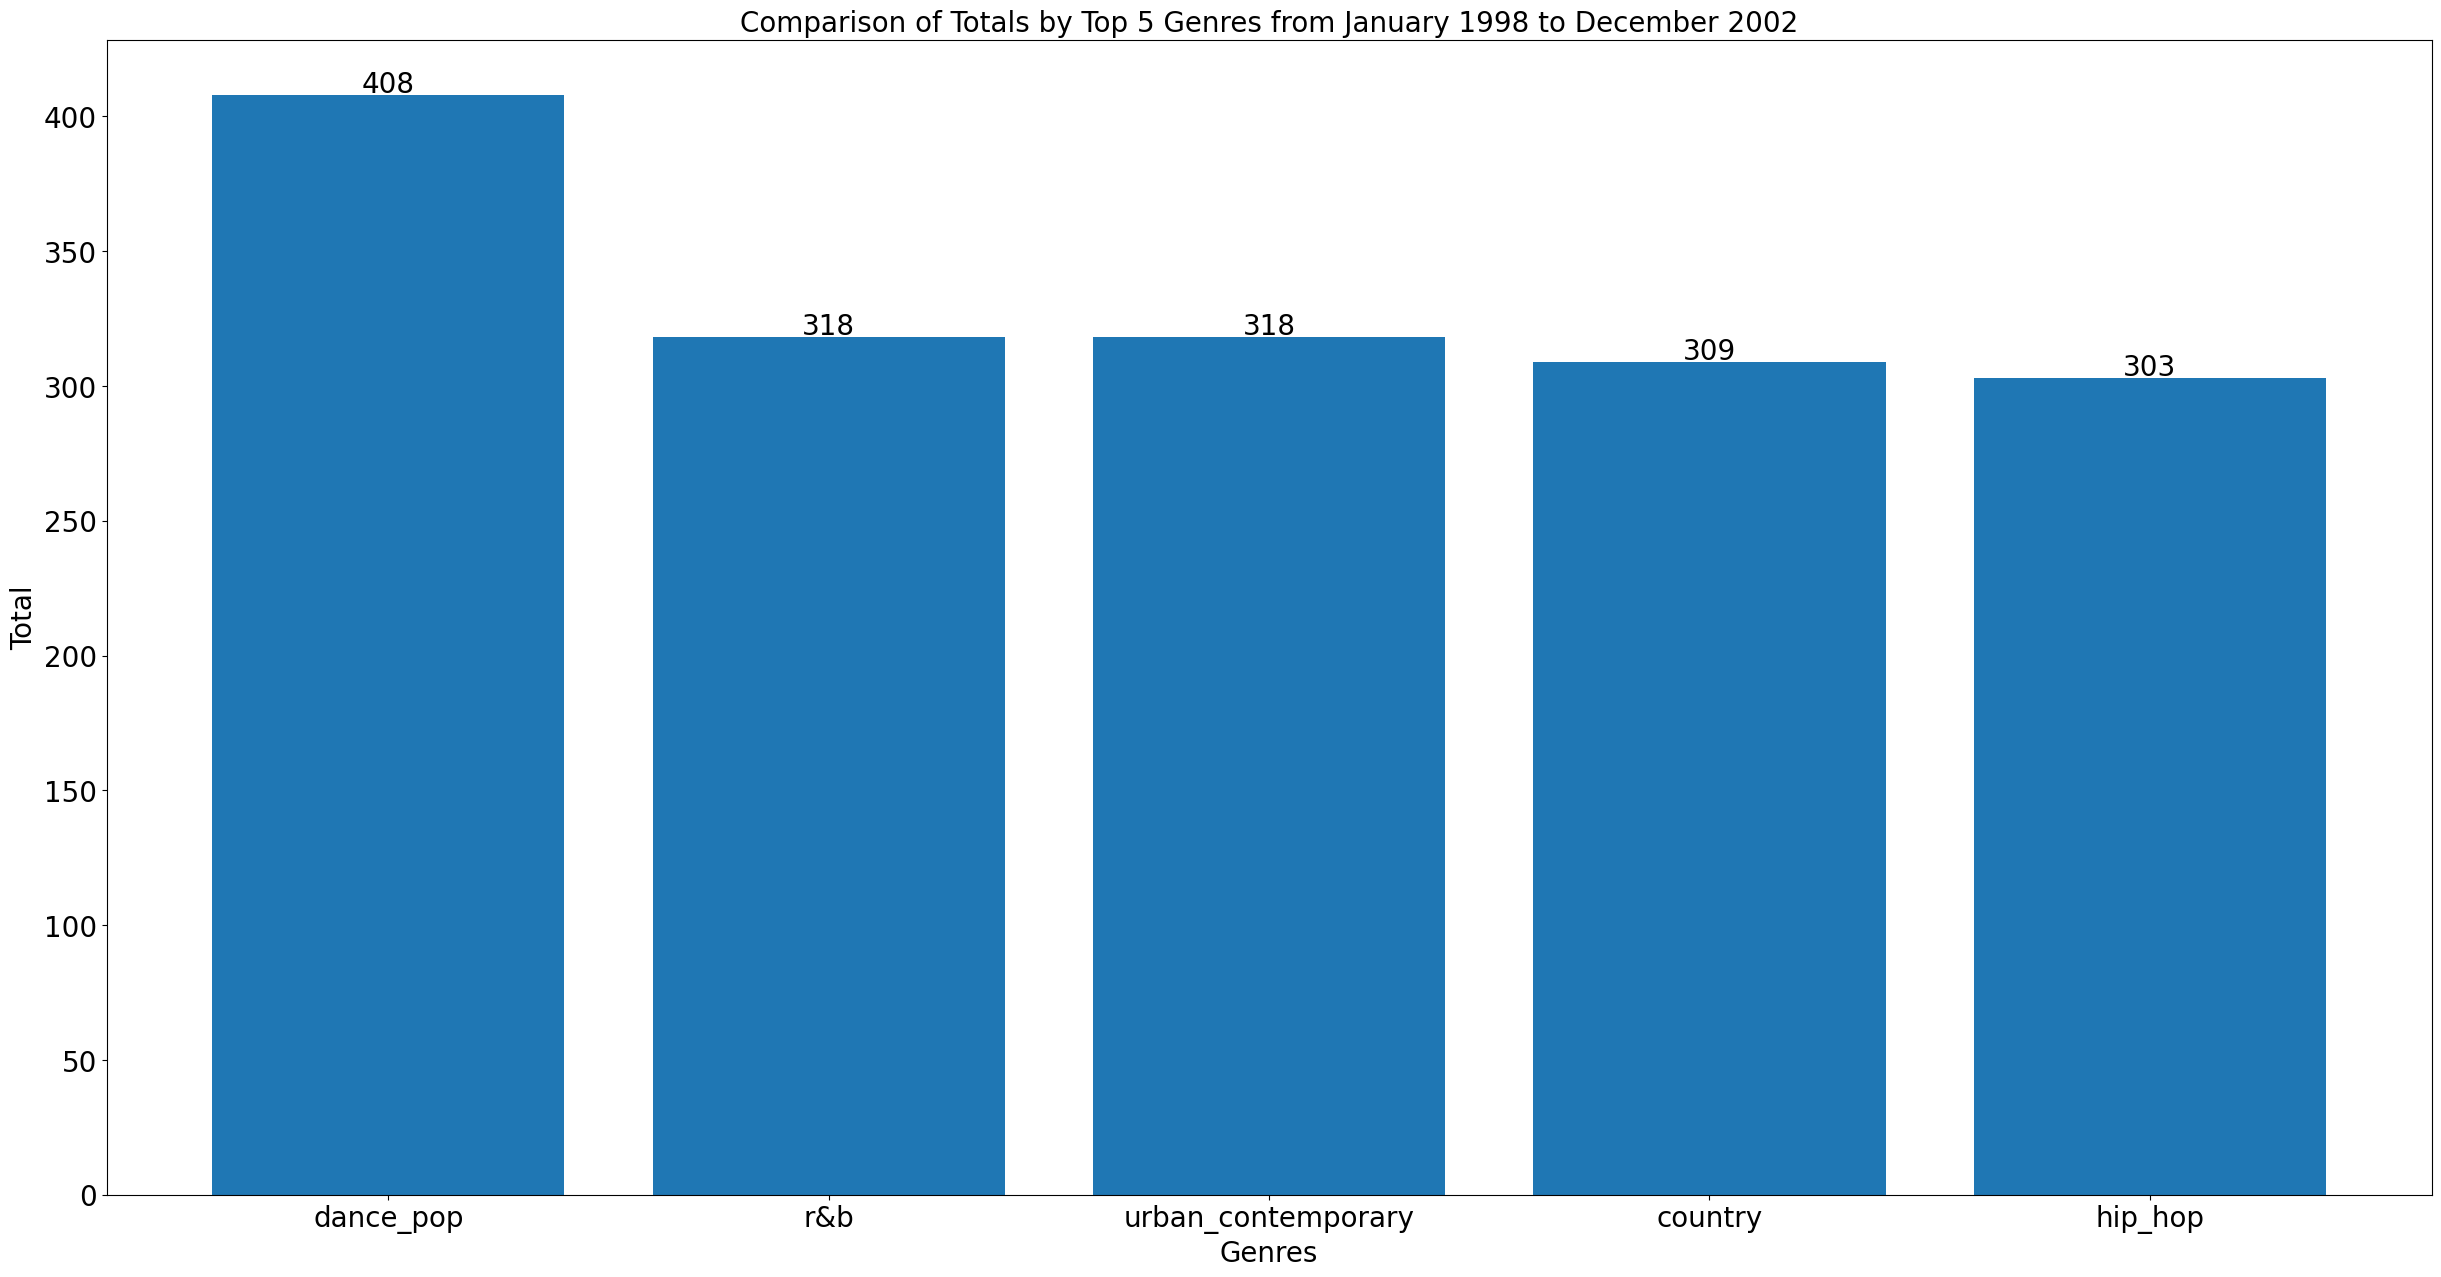

dance_pop has this performers with a TOP 1 song:	
Britney Spears with song ...Baby One More Time
, Nelly with song (Hot S**t) Country Grammar
, Celine Dion with song (If There Was) Any Other Way
, Mary J. Blige with song (You Make Me Feel Like) A Natural Woman (From "New York Undercover")
, Kelly Clarkson with song A Moment Like This
, Aaliyah with song Age Ain't Nothing But A Number
, TLC with song Ain't 2 Proud 2 Beg
, Jennifer Lopez Featuring Ja Rule with song Ain't It Funny
, Christina Aguilera with song Ain't No Other Man
, Jennifer Lopez with song Ain't Your Mama


r&b has this performers with a TOP 1 song:	
Mary J. Blige with song (You Make Me Feel Like) A Natural Woman (From "New York Undercover")
, Alicia Keys with song A Woman's Worth
, Aaliyah with song Age Ain't Nothing But A Number
, TLC with song Ain't 2 Proud 2 Beg
, Christina Aguilera with song Ain't No Other Man
, Monica with song All Eyez On Me
, Janet with song All For You
, Mariah Carey with song All I Want For Chri

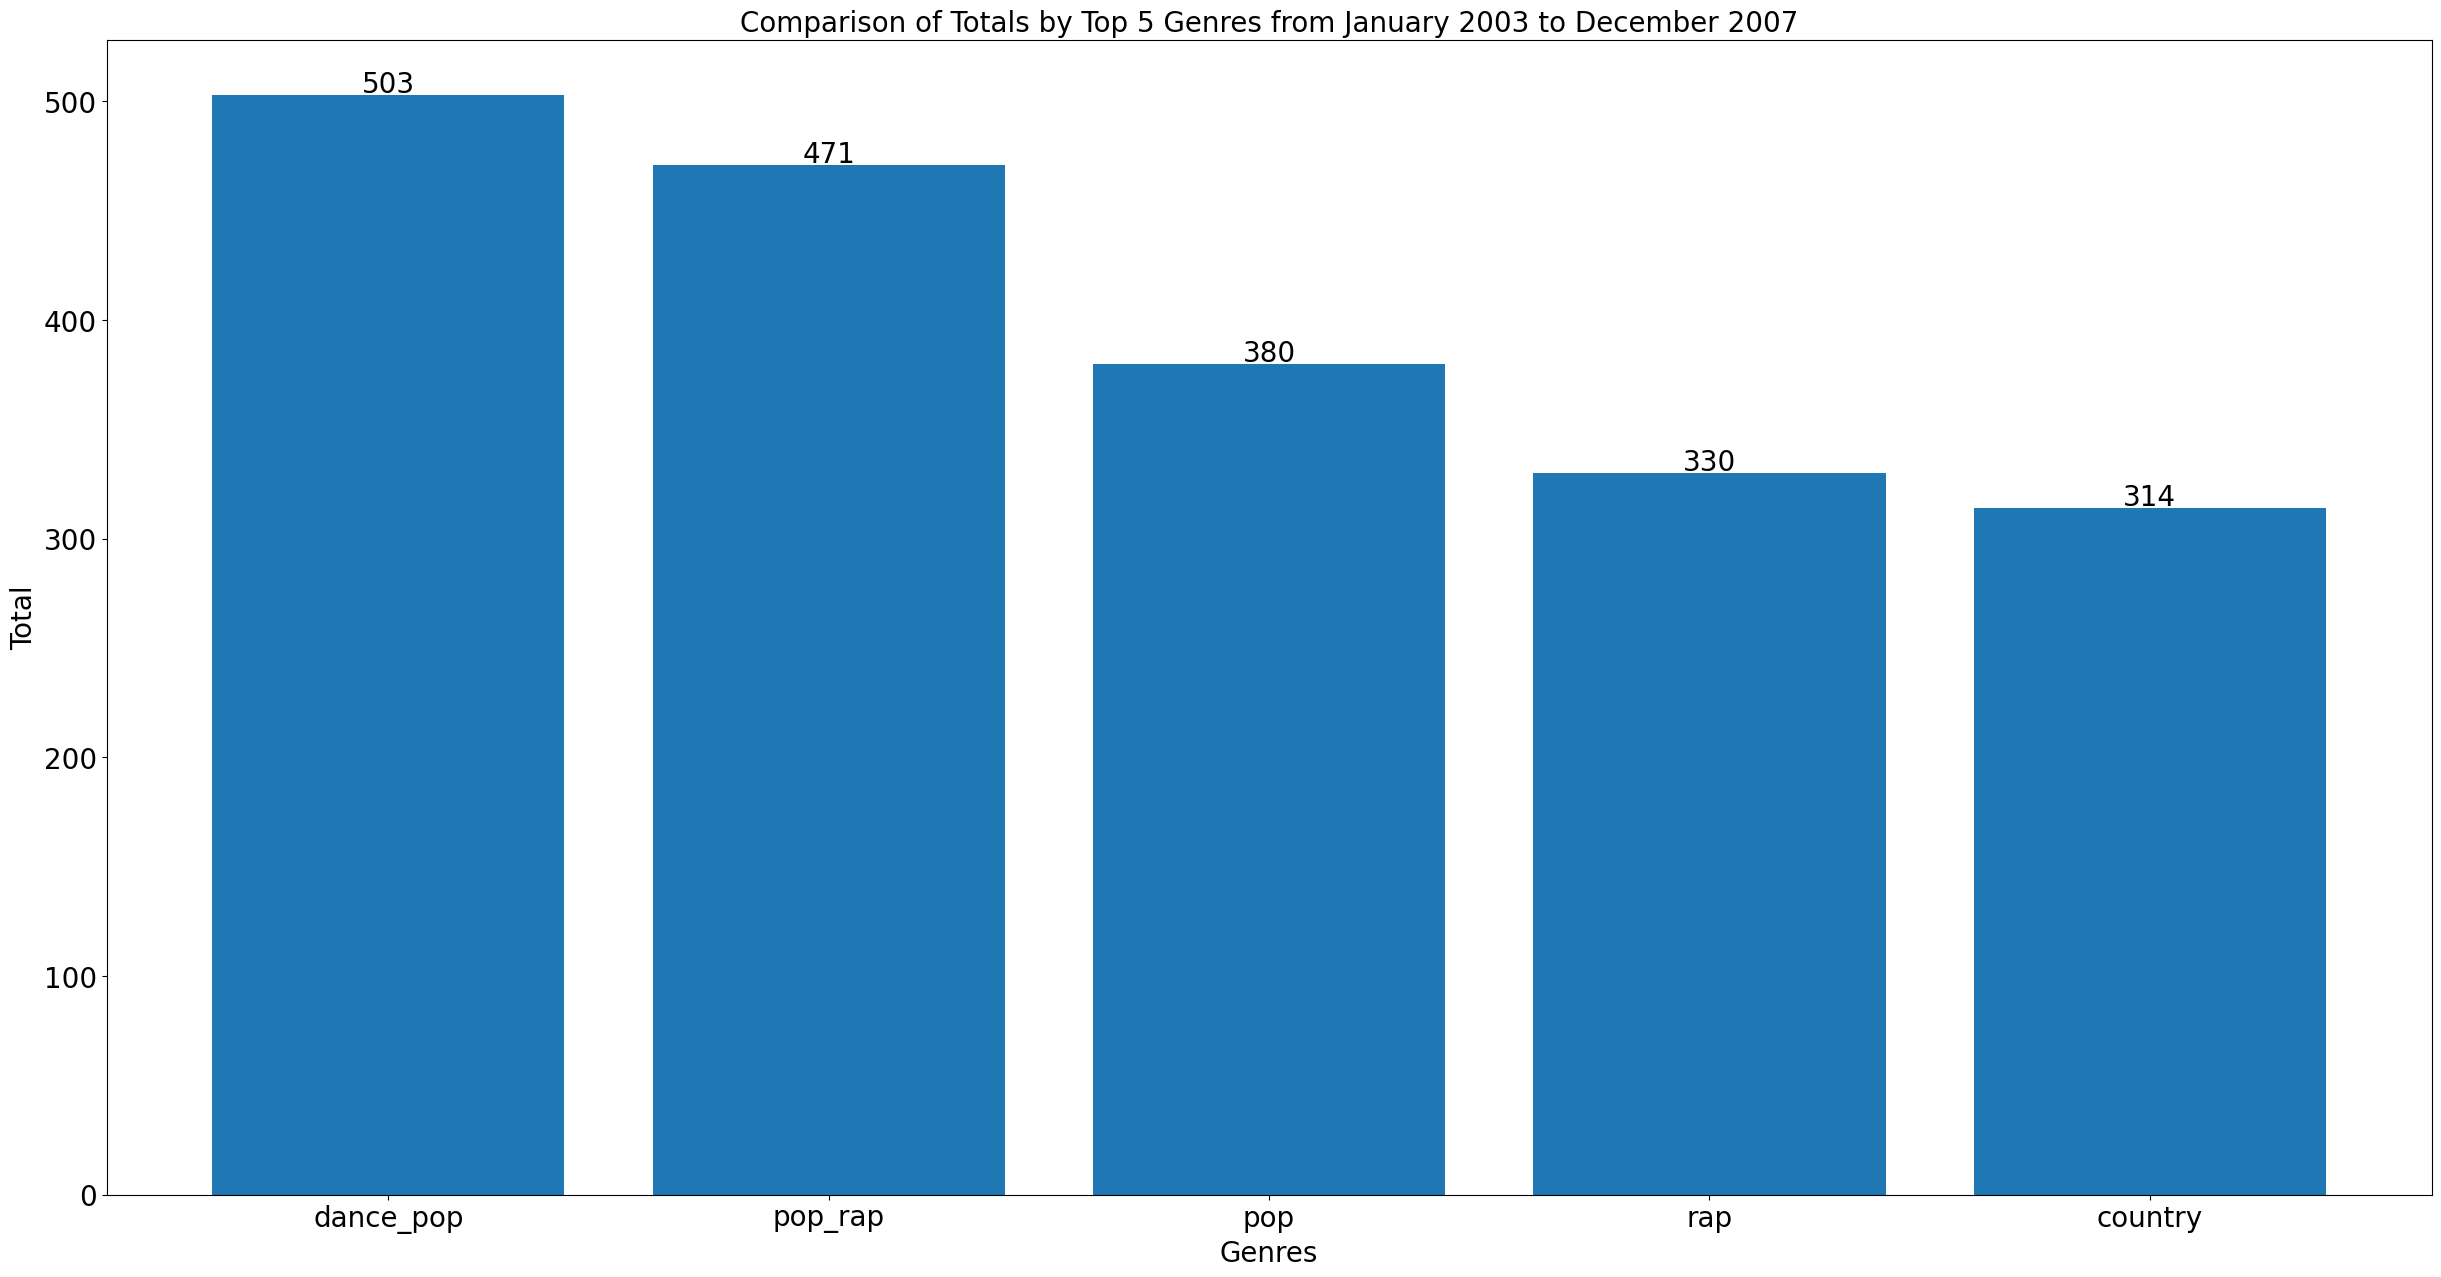

dance_pop has this performers with a TOP 1 song:	
Beyonce with song 1+1
, Gwen Stefani with song 4 In The Morning
, Avril Lavigne with song Alice
, Nelly Furtado with song All Good Things (Come To An End)
, Jennifer Lopez Featuring LL Cool J with song All I Have
, Mariah Carey with song All I Want For Christmas Is You
, Carrie Underwood with song All-American Girl
, Rihanna with song American Oxygen
, Akon with song Angel
, Beyonce Featuring Sean Paul with song Baby Boy


pop_rap has this performers with a TOP 1 song:	
Beyonce with song 1+1
, 50 Cent Featuring Nate Dogg with song 21 Questions
, Nelly Furtado with song All Good Things (Come To An End)
, Jennifer Lopez Featuring LL Cool J with song All I Have
, Akon with song Angel
, Beyonce Featuring Sean Paul with song Baby Boy
, Fantasia with song Baby Mama
, Chris Brown with song Back To Sleep
, Ne-Yo with song Beautiful Monster
, D4L with song Betcha Can't Do It Like Me


pop has this performers with a TOP 1 song:	
Plain White T's w

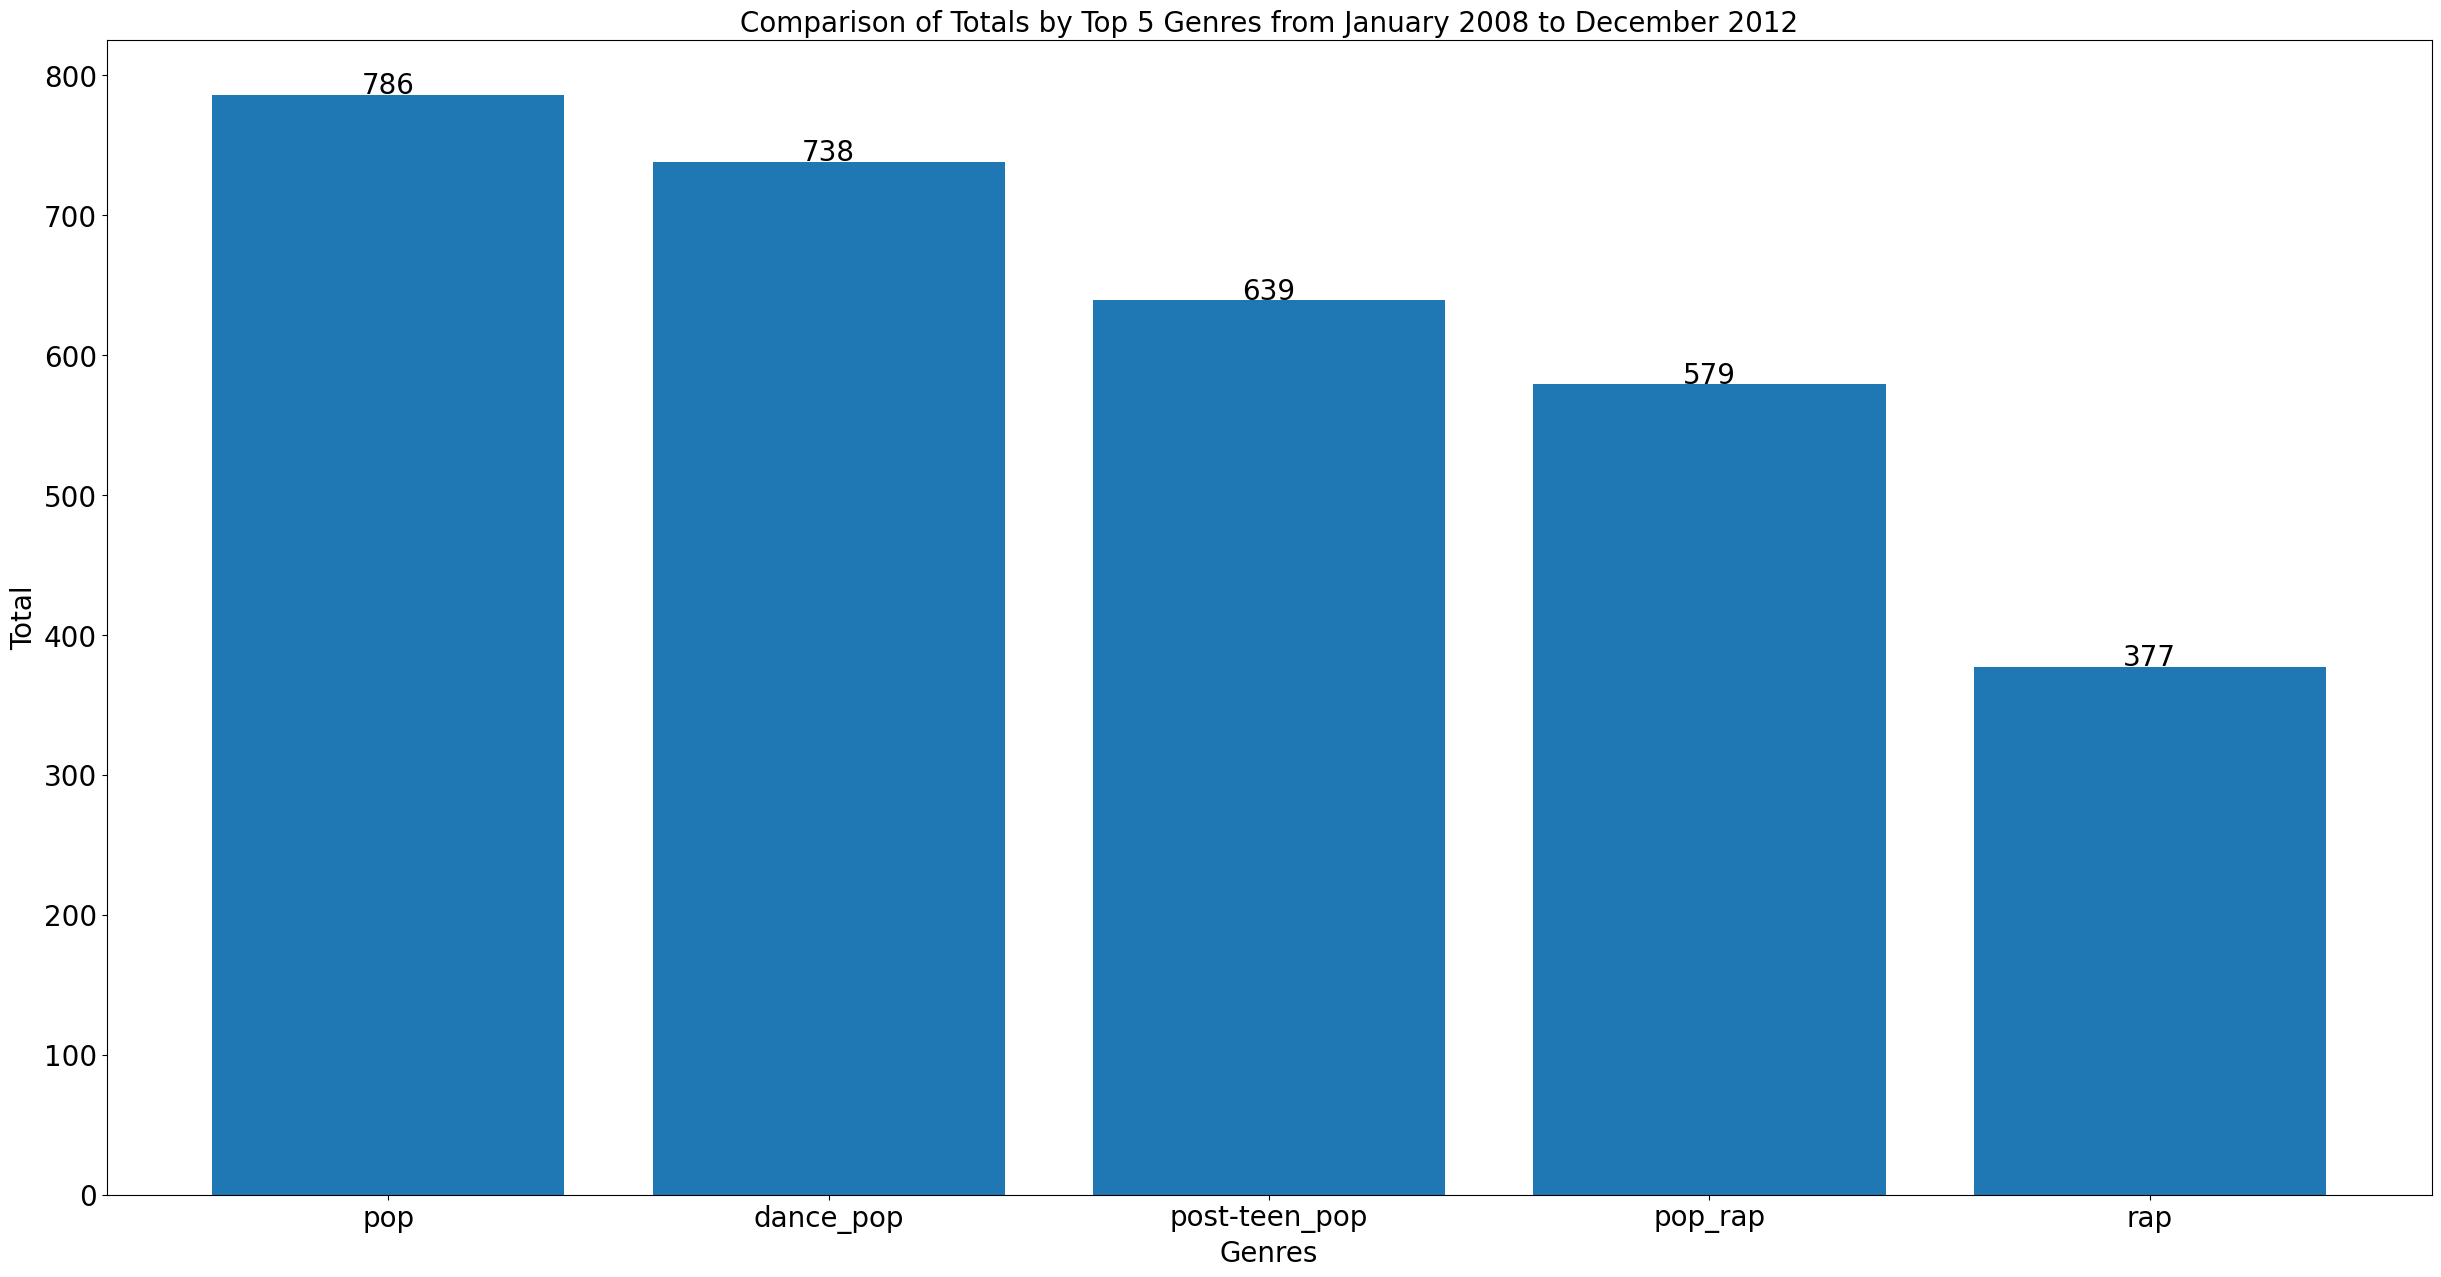

pop has this performers with a TOP 1 song:	
Britney Spears with song ...Baby One More Time
, Taylor Swift with song ...Ready For It?
, Beyonce with song 1+1
, Bruno Mars with song 24K Magic
, P!nk with song A Million Dreams
, Kelly Clarkson with song A Moment Like This
, Coldplay with song A Sky Full Of Stars
, Lady Gaga with song A-YO
, Adele with song All I Ask
, Mariah Carey with song All I Want For Christmas Is You


dance_pop has this performers with a TOP 1 song:	
Britney Spears with song ...Baby One More Time
, Beyonce with song 1+1
, T.I. with song 24's
, Bruno Mars with song 24K Magic
, P!nk with song A Million Dreams
, Kelly Clarkson with song A Moment Like This
, Lady Gaga with song A-YO
, Taylor Swift with song Afterglow
, Mariah Carey with song All I Want For Christmas Is You
, Rihanna with song American Oxygen


post-teen_pop has this performers with a TOP 1 song:	
Britney Spears with song ...Baby One More Time
, Taylor Swift with song ...Ready For It?
, P!nk with song A 

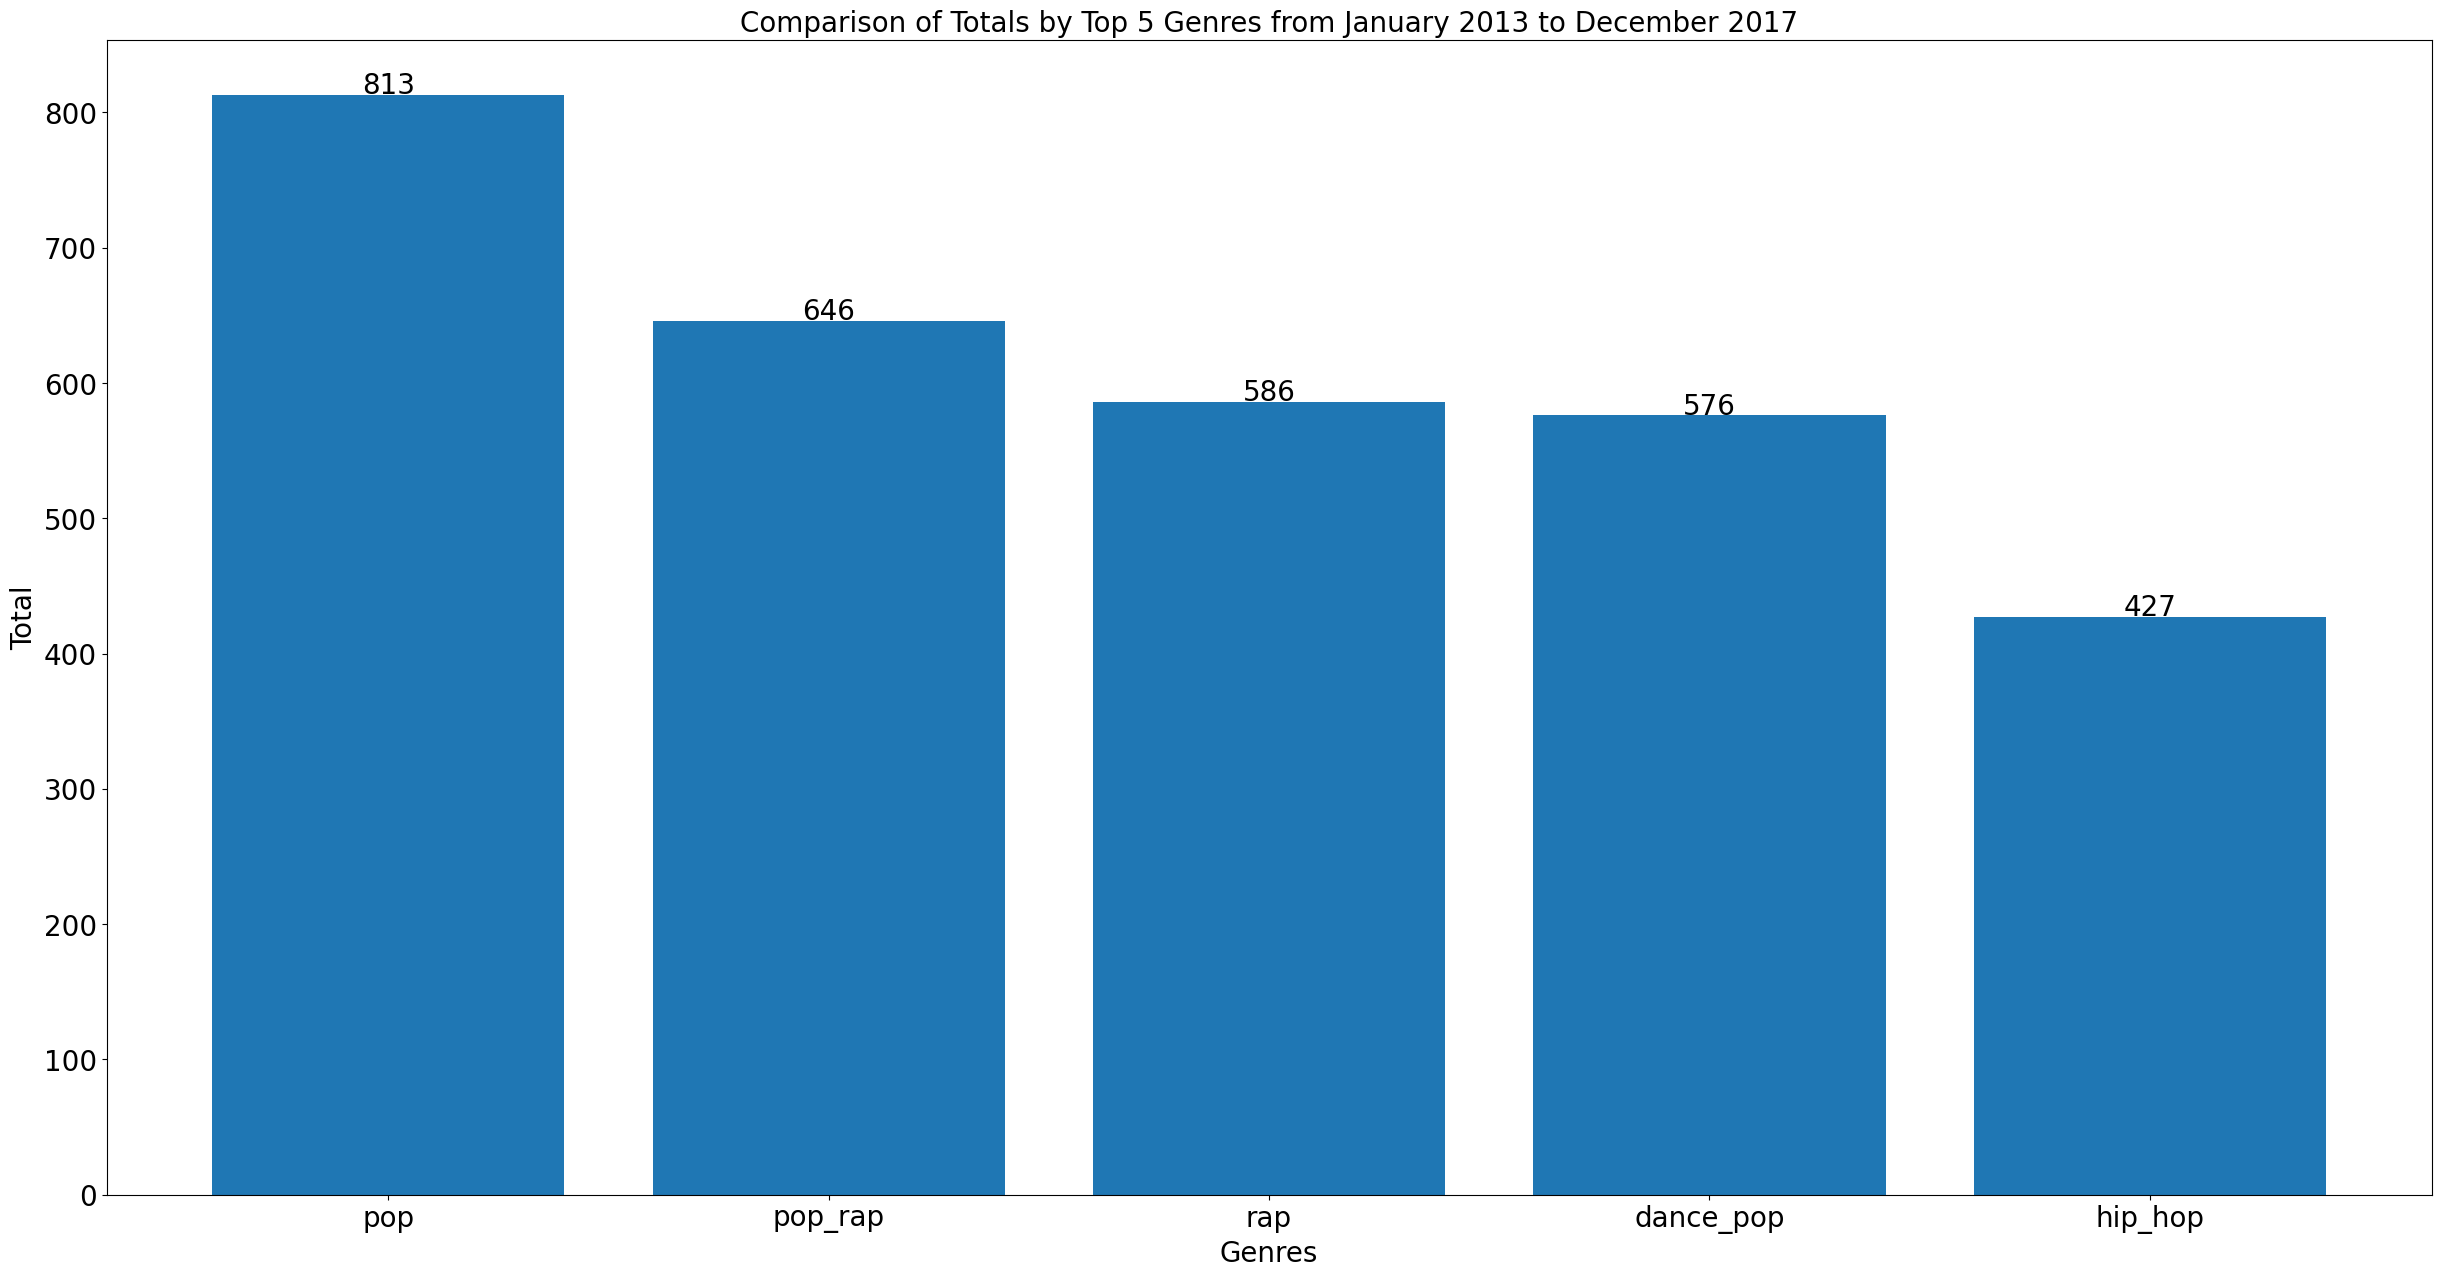

pop has this performers with a TOP 1 song:	
Taylor Swift with song ...Ready For It?
, Justin Bieber with song 2 Much
, Bruno Mars with song 24K Magic
, Miley Cyrus with song 7 Things
, The Weeknd with song A Lonely Night
, Ed Sheeran with song Afire Love
, Meghan Trainor with song All About That Bass
, Adele with song All I Ask
, John Legend with song All Of Me
, Taylor Swift Featuring Kendrick Lamar with song Bad Blood


pop_rap has this performers with a TOP 1 song:	
Migos Featuring Lil Uzi Vert with song Bad And Boujee
, Cardi B with song Be Careful
, Rae Sremmurd Featuring Gucci Mane with song Black Beatles
, Macklemore & Ryan Lewis Featuring Ray Dalton with song Can't Hold Us
, Pharrell Williams with song Come Get It Bae
, Justin Timberlake with song Cry Me A River
, Iggy Azalea Featuring Charli XCX with song Fancy
, DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne with song I'm The One
, Drake Featuring WizKid & Kyla with song One Dance
, Desiigner with son

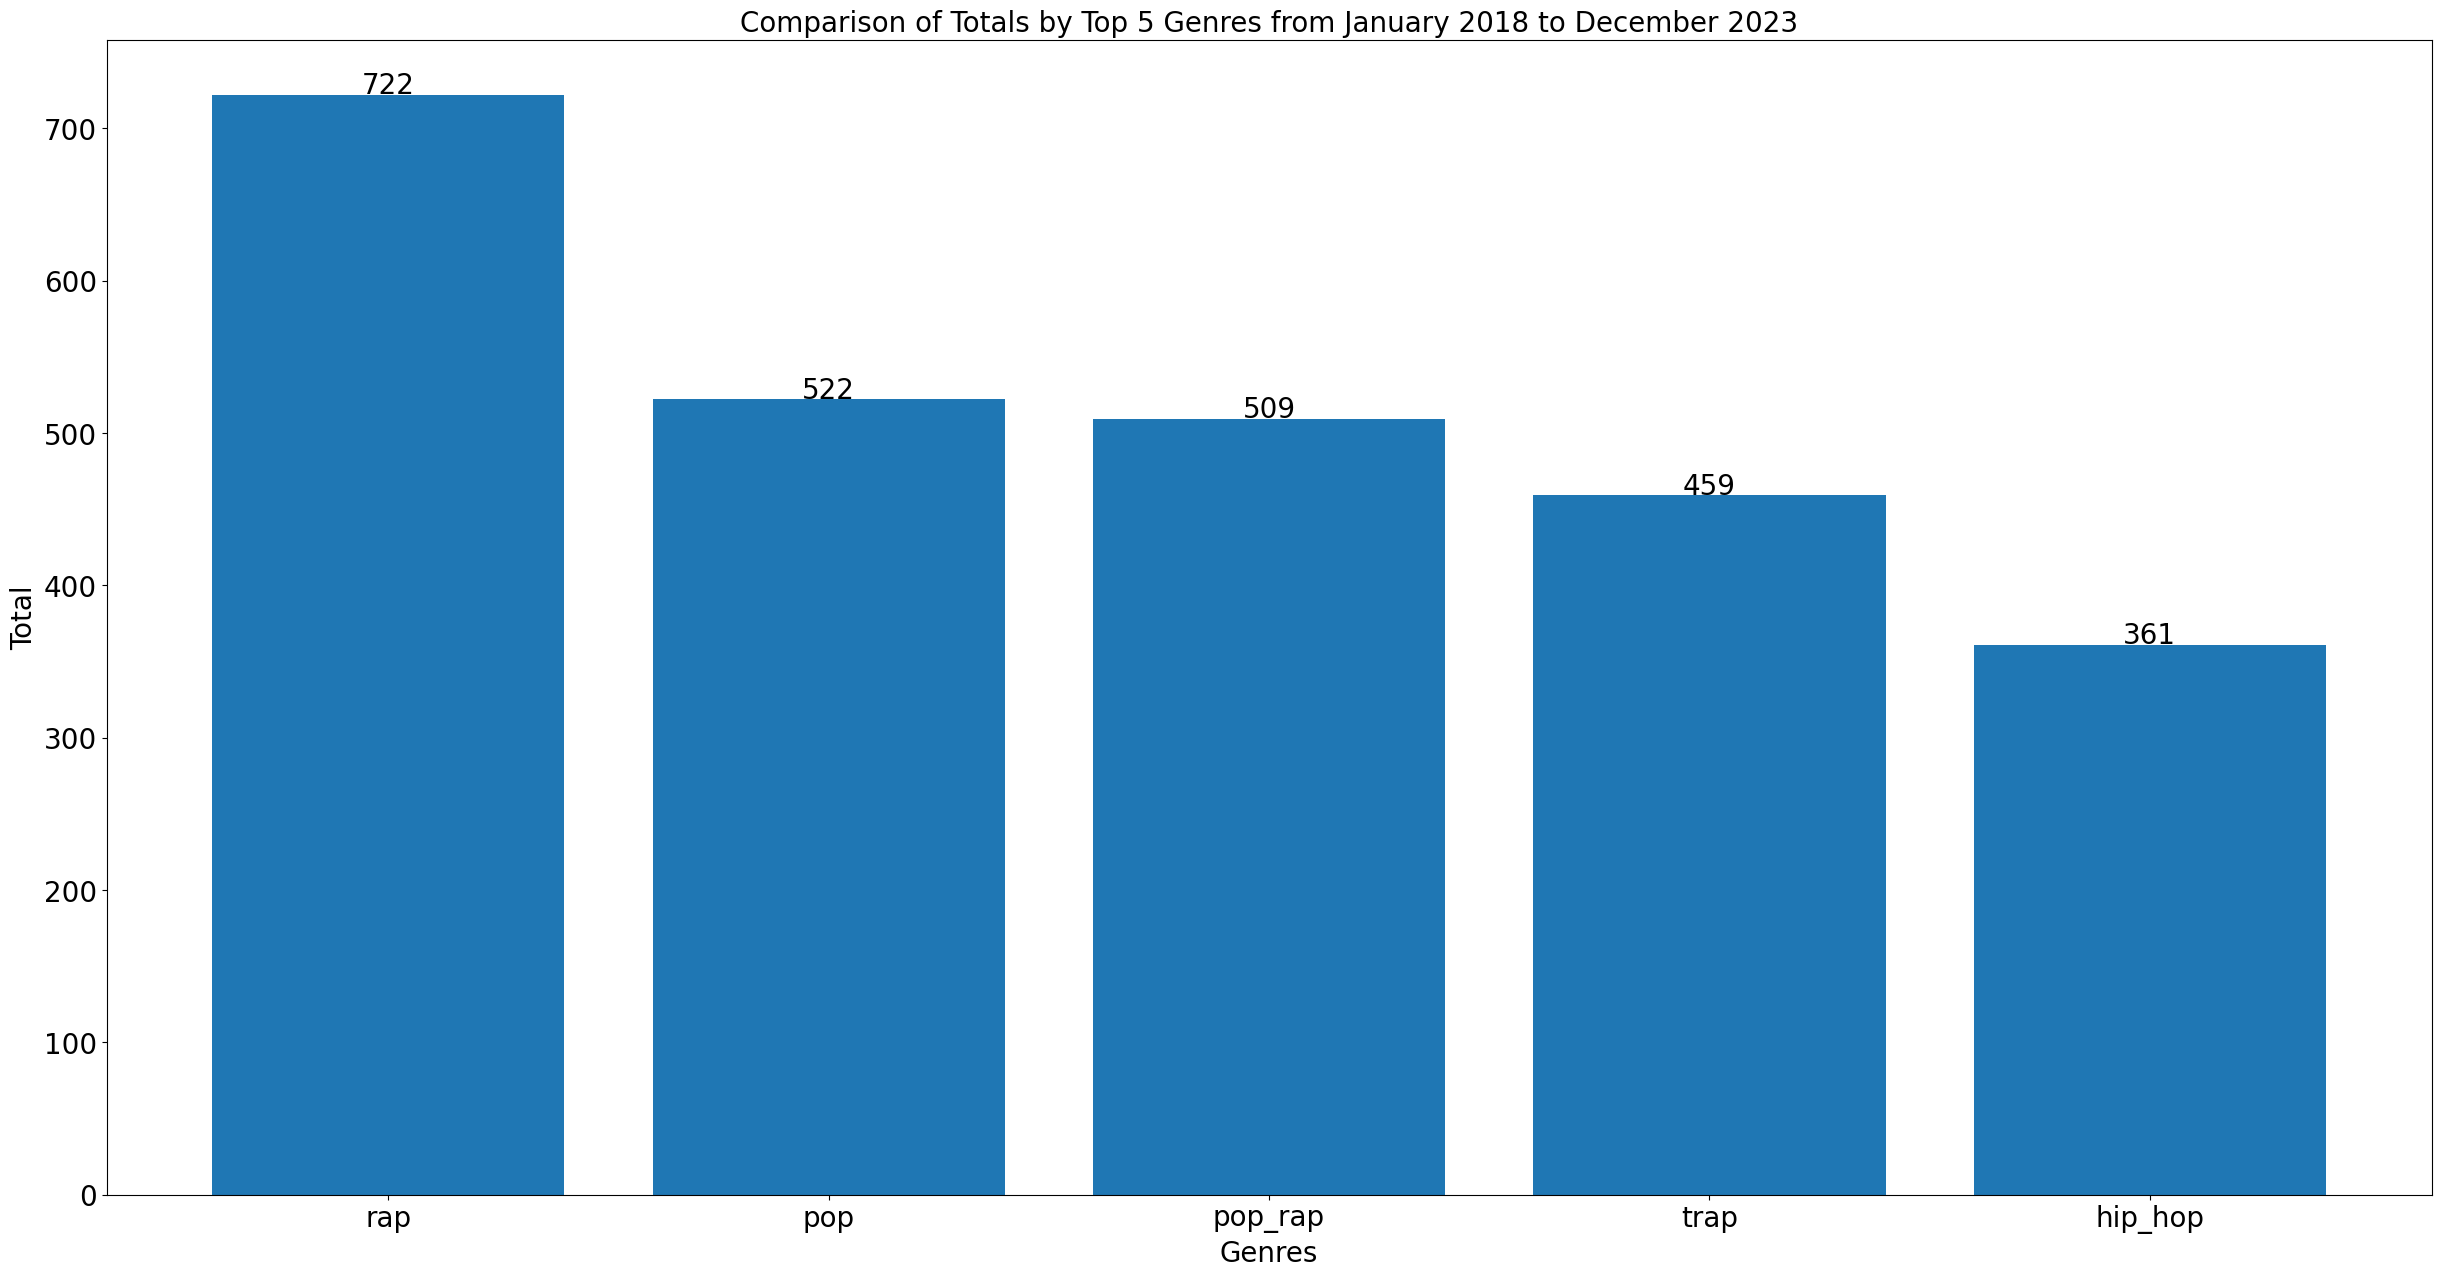

rap has this performers with a TOP 1 song:	
Drake with song 0 To 100 / The Catch Up
, Travis Scott with song 5% Tint
, Post Malone with song 92 Explorer
, Cardi B with song Be Careful
, Roddy Ricch with song Big Stepper
, Childish Gambino with song Feels Like Summer
, Cardi B, Bad Bunny & J Balvin with song I Like It
, Post Malone & Swae Lee with song Sunflower (Spider-Man: Into The Spider-Verse)


pop has this performers with a TOP 1 song:	
Taylor Swift with song ...Ready For It?
, Ariana Grande with song 34+35
, Billie Eilish with song 8
, Jonas Brothers with song A Little Bit Longer
, The Weeknd with song A Lonely Night
, Harry Styles with song Adore You
, Ed Sheeran with song Afire Love
, Mariah Carey with song All I Want For Christmas Is You
, Olivia Rodrigo with song All I Want
, Megan Thee Stallion with song B.I.T.C.H.


pop_rap has this performers with a TOP 1 song:	
Drake with song 0 To 100 / The Catch Up
, Megan Thee Stallion with song B.I.T.C.H.
, Cardi B with song Be Carefu

In [236]:
#estoy aquí 2024/01/08 20:44
def figure(df_categorica,columna_categorica,columna_numerica):
    
    df = df_categorica.copy()
    size=20
    # Bar plot using Matplotlib
    plt.figure(figsize=(30, 15))
    plt.bar(df[columna_categorica], df[columna_numerica])

    # Annotate the bars with numeric values
    for i, total in enumerate(df[columna_numerica]):
        plt.text(i, total + 1, str(total), ha='center',fontsize=size)
        # Setting font size for tick labels on x-axis and y-axis
        plt.xticks(fontsize=size)  # Change the font size here
        plt.yticks(fontsize=size)  # Change the font size here
    plt.xlabel('Genres',fontsize=size)
    plt.ylabel('Total',fontsize=size)
    anyo = df['start_date'].min().year
    anyo = str(anyo)
    anyo_fin = df['end_date'].max().year
    anyo_fin = str(anyo_fin)
    plt.title('Comparison of Totals by Top 5 Genres from January '+ anyo + " to December " + anyo_fin,fontsize=size)
    plt.show()
    
folder_path = '.\data_genre'  # Replace this with the absolute/relative path to your folder
danceability_list=[]
#danceability_dictionary={}
#danceability_dictionary.columns
# Loop through files in the folder
number_of_performers=10
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df_genres_count = pd.read_csv(file_path,sep=";").set_index("index")
        df_genres_count["start_date"] = pd.to_datetime(df_genres_count["start_date"])
        df_genres_count["end_date"] = pd.to_datetime(df_genres_count["end_date"])
        df_categorica = df_genres_count.sort_values(by="totals",ascending=False).head(5).copy()
        #print(df_categorica)
        figure(df_categorica,'genre','totals')
        #plot_categorical_numerical_relationship(df_categorica,'Genre','Count',True)
        
        danceability_dictionary={}
        df_danceability=pd.DataFrame(columns=['SongID', 'danceability','start_date','end_date'])
        #df_danceability._append
        iteration_number=0
        
        for index,row in df_categorica.iterrows():
            value_to_find=row['genre']
            #condition_1= df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"]
            condition_1= (df_Hot_Stuff_with_genres['WeekID_As_Date'] >= row["start_date"]) & (df_Hot_Stuff_with_genres['WeekID_As_Date'] <= row["end_date"])
            #print("condition_1_total_of",len(condition_1))
            condition_2= df_Hot_Stuff_with_genres['Week Position'] == 1
            #print("condition_2_total_of",len(condition_2))
            #condition_3= df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['spotify_genre_list'].apply(lambda x: value_to_find in x)]
            #print(condition_3)
            performer = df_Hot_Stuff_with_genres[(condition_1) & (condition_2)].copy()
            performer.reset_index(inplace=True)
            #print(performer.columns)
            #print('Performer y:',performer['Performer_y'])
            condition_3=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list_no_dups'].apply(lambda x: value_to_find in x)].copy()
        #print("Condition_3:",condition_3['Performer'])
            condition_3.rename(columns={'Performer': 'Performer_x'}, inplace=True)
            
            df_artists_of_the_genre = pd.merge(condition_3, performer, on='Performer_x', how='inner')
            #print(f"iteration_number:{iteration_number}\r\n\t{df_artists_of_the_genre.head(5).columns.to_list()}")
            #break
            
            unique_values_Performer= df_artists_of_the_genre['Performer_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df_Performer = pd.DataFrame(unique_values_Performer, columns=['Performer'])
            unique_df_Performer = unique_df_Performer.head(number_of_performers).copy()
            ####
            unique_values_SongID= df_artists_of_the_genre['SongID_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df_SongID = pd.DataFrame(unique_values_SongID, columns=['SongID'])
            unique_df_SongID = unique_df_Performer.head(number_of_performers).copy()
            ####
            #print(f"unique_df:{unique_df}")
            #print("performer:",len(performer))
            #print("performer type:",type(performer))
            #performer['Performer'].nunique()
            print(f"{value_to_find} has this performers with a TOP 1 song:",end='\t\r\n')
            loop=0
            

            #print("columns:",unique_df.columns)
            
            for index_1, row_1 in unique_df_SongID.head(number_of_performers).iterrows():
                #print(f"{', '.join(map(str, row_1['Performer_x']))}")
                df_song=df_artists_of_the_genre[df_artists_of_the_genre['Performer_x']==row_1['Performer']].copy()
                #print(f"df_song_len:{len(df_song)}")
                #print("df_song['Song'].values()",df_song['Song'].values())
                #print(df_song)
                for index_2,row_2 in df_song.head(1).iterrows():
                    song = row_2['Song']
                    SongID = f"{song}{row_1['Performer']}"
                    if loop != 0:
                        print(f", {row_1['Performer']} with song {song}")
                        #print(f", {row_1['Performer']} with song {song} and SongID:{song}{row_1['Performer']}",end="")
                    else:
                        print(f"{row_1['Performer']} with song {song}")
                        #print(f"{row_1['Performer']} with song {song} and SongID:{song}{row_1['Performer']}",end="")
                    loop=+1
                    df_danceability=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['SongID'] == SongID].copy()
                    #df_danceability.reset_index(inplace=True)
                    danceability_value=df_danceability["danceability"].values
                    spotify_genre_as_list_value=df_danceability["spotify_genre_list_no_dups"].values
                    #print(t)
                    if isinstance(danceability_value, np.ndarray):
                        if len(danceability_value)>=1:
                            danceability_value = float(danceability_value[0])
                        else:
                            danceability_value=0    
                    else:
                        danceability_value=0
                    if len(spotify_genre_as_list_value)==0:
                            spotify_genre_as_list_value=['unknown']
                    else:
                            spotify_genre_as_list_value=spotify_genre_as_list_value[0]

                    #print(f" danceability_value:{danceability_value} type:{type(danceability_value)}")
                    df_danceability_row_data = {
                    'SongID': SongID,
                    'spotify_genre_as_list': spotify_genre_as_list_value,
                    'spotify_genre_scatter': value_to_find,
                    'spotify_genre_count': row['totals'],
                    'danceability': danceability_value * 100,
                    'start_date': row["start_date"], 
                    'end_date': row["end_date"]
                                            }
                    #print("df_danceability_row_data:",df_danceability_row_data,sep="\r\n\t")
                    danceability_list.append(df_danceability_row_data)
                    #df_danceability = df_danceability.append(df_danceability_row_data, ignore_index=True)
                #search and store danceability of the song
                #SongID.append(f"{song}{row_1['Performer']}")
                #Genre.append(row['Genre'])
                #danceability_dictionary['SongID','Genre']=[SongID,row['Genre']]
                #danceability_dictionary['Genre']=row['Genre']
                #danceability_list.append(danceability_dictionary)
                #danceability_list
                #danceability_dictionary['SongID']=row_1['Performer']
                #danceability_dictionary["Song"]=song
                #danceability_list.append(danceability_dictionary)
            print("")
            print("")
df_danceability = pd.DataFrame(danceability_list)
print(danceability_list)


In [217]:
#estoy aquí 2024/01/05 21:15
#correlacion con danceability
#one hit wonder
#top 1
def figure(df_categorica):
    
    df = df_categorica.copy()
    size=20
    # Bar plot using Matplotlib
    plt.figure(figsize=(30, 15))
    plt.bar(df['Genre'], df['Count'])

    # Annotate the bars with numeric values
    for i, total in enumerate(df['Count']):
        plt.text(i, total + 1, str(total), ha='center',fontsize=size)
        # Setting font size for tick labels on x-axis and y-axis
        plt.xticks(fontsize=size)  # Change the font size here
        plt.yticks(fontsize=size)  # Change the font size here
    plt.xlabel('Genres',fontsize=size)
    plt.ylabel('Total',fontsize=size)
    anyo = df['start_date'].min().year
    anyo = str(anyo)
    anyo_fin = df['end_date'].max().year
    anyo_fin = str(anyo_fin)
    plt.title('Comparison of Totals by Top 5 Genres from '+ anyo + " to " + anyo_fin,fontsize=size)
    plt.show()
    
folder_path = '.\data_genre'  # Replace this with the absolute/relative path to your folder
danceability_list=[]
#danceability_dictionary={}
#danceability_dictionary.columns
# Loop through files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df_genres_count = pd.read_csv(file_path,sep=";").set_index("index")
        df_genres_count["start_date"] = pd.to_datetime(df_genres_count["start_date"])
        df_genres_count["end_date"] = pd.to_datetime(df_genres_count["end_date"])
        df_categorica = df_genres_count.sort_values(by="count",ascending=False).head(5).copy()
        figure(df_categorica)
        #plot_categorical_numerical_relationship(df_categorica,'Genre','Count',True)
        
        danceability_dictionary={}
        df_danceability=pd.DataFrame(columns=['SongID', 'danceability','start_date','end_date'])
        #df_danceability._append
        iteration_number=0
        
        for index,row in df_categorica.iterrows():
            value_to_find=row['genre']
            #condition_1= df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"]
            condition_1= (df_Hot_Stuff_with_genres['WeekID_As_Date'] >= row["start_date"]) & (df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"])
            #print("condition_1_total_of",len(condition_1))
            condition_2= df_Hot_Stuff_with_genres['Week Position'] == 1
            #print("condition_2_total_of",len(condition_2))
            #condition_3= df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['spotify_genre_list'].apply(lambda x: value_to_find in x)]
            #print(condition_3)
            performer = df_Hot_Stuff_with_genres[(condition_1) & (condition_2)].copy()
            performer.reset_index(inplace=True)
            #print(performer.columns)
            #print('Performer y:',performer['Performer_y'])
            condition_3=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].copy()
        #print("Condition_3:",condition_3['Performer'])
            condition_3.rename(columns={'Performer': 'Performer_x'}, inplace=True)
            
            df_artists_of_the_genre = pd.merge(condition_3, performer, on='Performer_x', how='inner')
            #print(f"iteration_number:{iteration_number}\r\n\t{df_artists_of_the_genre.head(5).columns.to_list()}")
            #break

            unique_values_Performer= df_artists_of_the_genre['Performer_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df_Performer = pd.DataFrame(unique_values_Performer, columns=['Performer'])
            unique_df_Performer = unique_df_Performer.head(5).copy()
            ####
            unique_values_SongID= df_artists_of_the_genre['SongID_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df_SongID = pd.DataFrame(unique_values_SongID, columns=['SongID'])
            unique_df_SongID = unique_df_Performer.head(5).copy()
            ####
            #print(f"unique_df:{unique_df}")
            #print("performer:",len(performer))
            #print("performer type:",type(performer))
            #performer['Performer'].nunique()
            print(f"{value_to_find} has this performers:",end='')
            loop=0
            

            #print("columns:",unique_df.columns)
            for index_1, row_1 in unique_df_SongID.head(5).iterrows():
                #print(f"{', '.join(map(str, row_1['Performer_x']))}")
                df_song=df_artists_of_the_genre[df_artists_of_the_genre['Performer_x']==row_1['Performer']].copy()
                #print(f"df_song_len:{len(df_song)}")
                #print("df_song['Song'].values()",df_song['Song'].values())
                #print(df_song)
                for index_2,row_2 in df_song.head(1).iterrows():
                    song = row_2['Song']
                    SongID = f"{song}{row_1['Performer']}"
                    if loop != 0:
                        print(f", {row_1['Performer']} with song {song}",end="")
                        #print(f", {row_1['Performer']} with song {song} and SongID:{song}{row_1['Performer']}",end="")
                    else:
                        print(f"{row_1['Performer']} with song {song}",end="")
                        #print(f"{row_1['Performer']} with song {song} and SongID:{song}{row_1['Performer']}",end="")
                    loop=+1
                    df_danceability=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['SongID'] == SongID].copy()
                    #df_danceability.reset_index(inplace=True)
                    danceability_value=df_danceability["danceability"].values
                    spotify_genre_as_list_value=df_danceability["spotify_genre_list"].values
                    #print(t)
                    if isinstance(danceability_value, np.ndarray):
                        if len(danceability_value)>=1:
                            danceability_value = float(danceability_value[0])
                        else:
                            danceability_value=0    
                    else:
                        danceability_value=0
                    if len(spotify_genre_as_list_value)==0:
                            spotify_genre_as_list_value=['unknown']
                    else:
                            spotify_genre_as_list_value=spotify_genre_as_list_value[0]

                    #print(f"danceability_value:{danceability_value} type:{type(danceability_value)}")
                    df_danceability_row_data = {
                    'SongID': SongID,
                    'spotify_genre_as_list': spotify_genre_as_list_value,
                    'spotify_genre_scatter':value_to_find,
                    'danceability':danceability_value*100,
                    'start_date': row["start_date"], 
                    'end_date': row["end_date"]
                                            }
                    #print("df_danceability_row_data:",df_danceability_row_data,sep="\r\n\t")
                    danceability_list.append(df_danceability_row_data)
                    #df_danceability = df_danceability.append(df_danceability_row_data, ignore_index=True)
                #search and store danceability of the song

            print("")
            print("")
            #df_danceability=pd.DataFrame(danceability_list,columns=['SongID'])
            #df_danceability.drop_duplicates(inplace=True)
            #print(f"danceability_list:{danceability_list}")
            #df_danceability = pd.DataFrame(danceability_list,columns=['Performer','Song'])
            #df_danceability.reset_index(inplace=True)
            #print(f"df_danceability:{df_danceability}")
        #draft of an idea is for each top genre show 5 artists with a top 1 under that spotify genre

            #df_Hot_Stuff_with_genres[condition['spotify_genre_list'] in row['Genre']]
            
        # Perform operations with the file
        #print(file_path)  # Example: Print file paths
#my_dict = {key: value for key, value in zip(SongID, Genre)}
#print(f"my_dict:{my_dict}")
#unique_df_SongID
df_danceability = pd.DataFrame(danceability_list)
print(danceability_list)
#print(df_danceability)

KeyError: 'Genre'

<Figure size 3000x1500 with 0 Axes>

In [216]:
df_Hot_100_Audio_Features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['SongID', 'Performer', 'Song', 'spotify_genre', 'spotify_track_id',
       'spotify_track_preview_url', 'spotify_track_duration_ms',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity', 'spotify_genre_list',
       'spotify_genre_list_no_dups'],
      dtype='object')>

In [215]:
df_danceability
#estoy aquí
#2024/01/07 16:43

NameError: name 'df_danceability' is not defined

In [ ]:
df_danceability[df_danceability['spotify_genre_scatter'].str.contains('hip')]

In [ ]:
df_Hot_100_Audio_Features.spotify_genre_list_no_dups